In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
pal = sns.color_palette()

In [2]:
sparse_predictors = ["age_group", "male", "anc_cat", "facdelivery", "hh_urban", "v024"] #administrative data
contextual_predictors = ["nightlights_composite", "un_population_cat", "travel_times_2015"] #custer level data from censor
additional_predictors = ["birth_order", "mum_educlow", "mum_educhigher",
                        "npregnancies", "firstpreg", "hh_5plus", "hh_wealth"]# survey data
                       

extra_features = ['sdist', 'regionname', 'clusterid', 'ia2016fic']

contextual_datasets = ['IA2020', 'IA2015','ML2018','NG2018']
countries = ['IA2020', 'IA2015', 'IA2006', 'ML2018', 'ML2006', 'NG2018', 'NG2008']

In [3]:
#Utility functions
categorical_predictors = ['age_group', 'anc_cat', 'un_population_cat', 'nightlights_composite', 'v024', 'clusterid', 'hh_wealth']
extra_features = ['sdist', 'regionname', 'clusterid', 'all_vac', 'ia2015fic', 'IMI_target']

#Read file from CSV and return a dataframe
def read_file(country, verbose = False):
    df = (pd.read_csv('../data/clean_data/' + country + ".csv"))
    for feature in categorical_predictors:
        if feature in df.columns:
            df[feature] = df[feature].astype('category')
    if verbose:
        print('Read complete: Clean data for '+country)
        print(df.dtypes)
    return df

def get_clean_dataset(country, verbose = False):
    df = read_file(country, verbose)        
    df = df.dropna()
    if country =='IA2020':
        df = df.drop(['sdist', 'regionname', 'clusterid', 'all_vac'], axis=1)
    elif country == 'IA2015':        
        df = df.drop(extra_features, axis=1)
    else:
        df = df.drop(['regionname', 'clusterid', 'all_vac'], axis=1)
    if(verbose):
        print("Missing values and extra columns removed.")
    return df


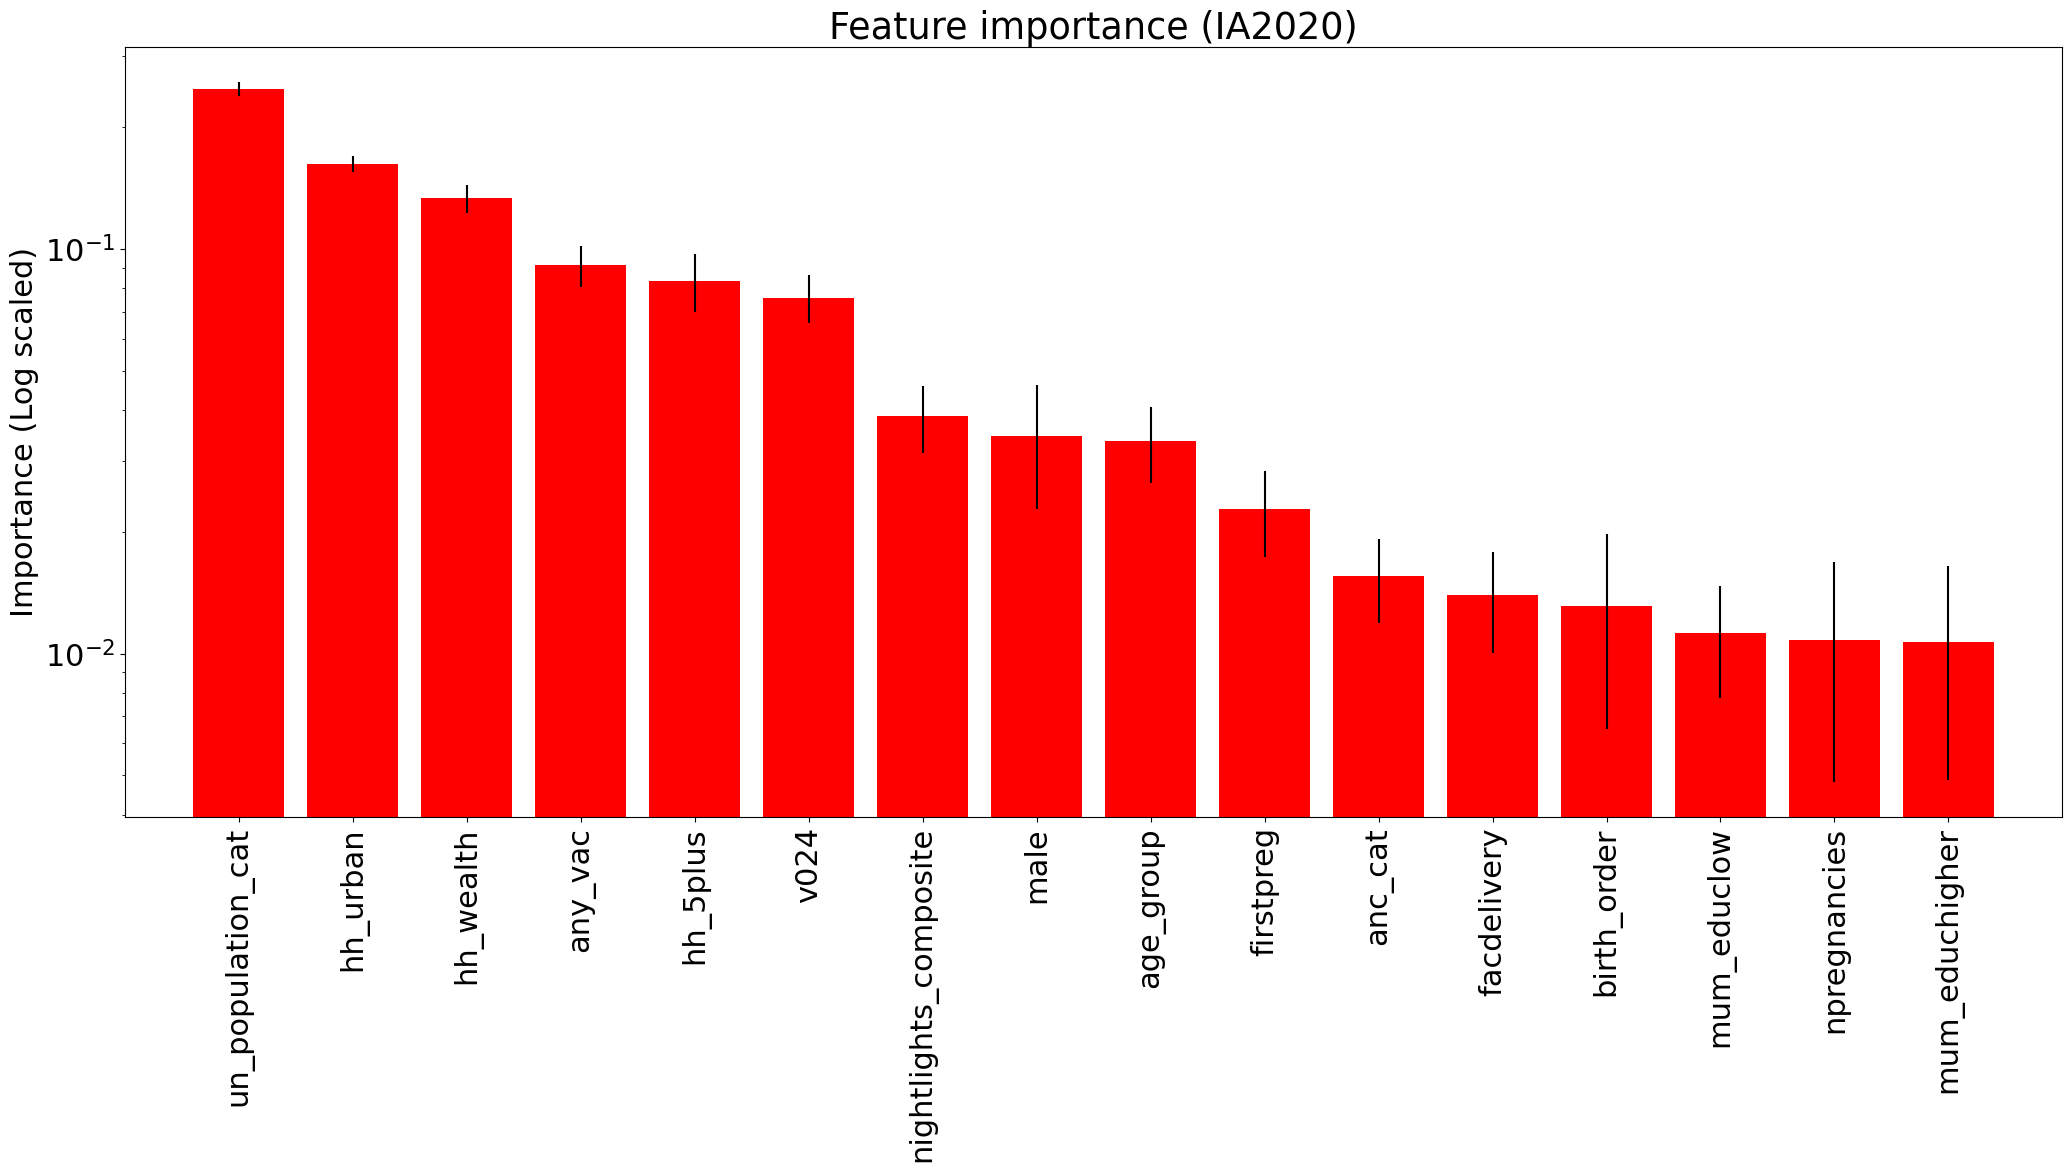

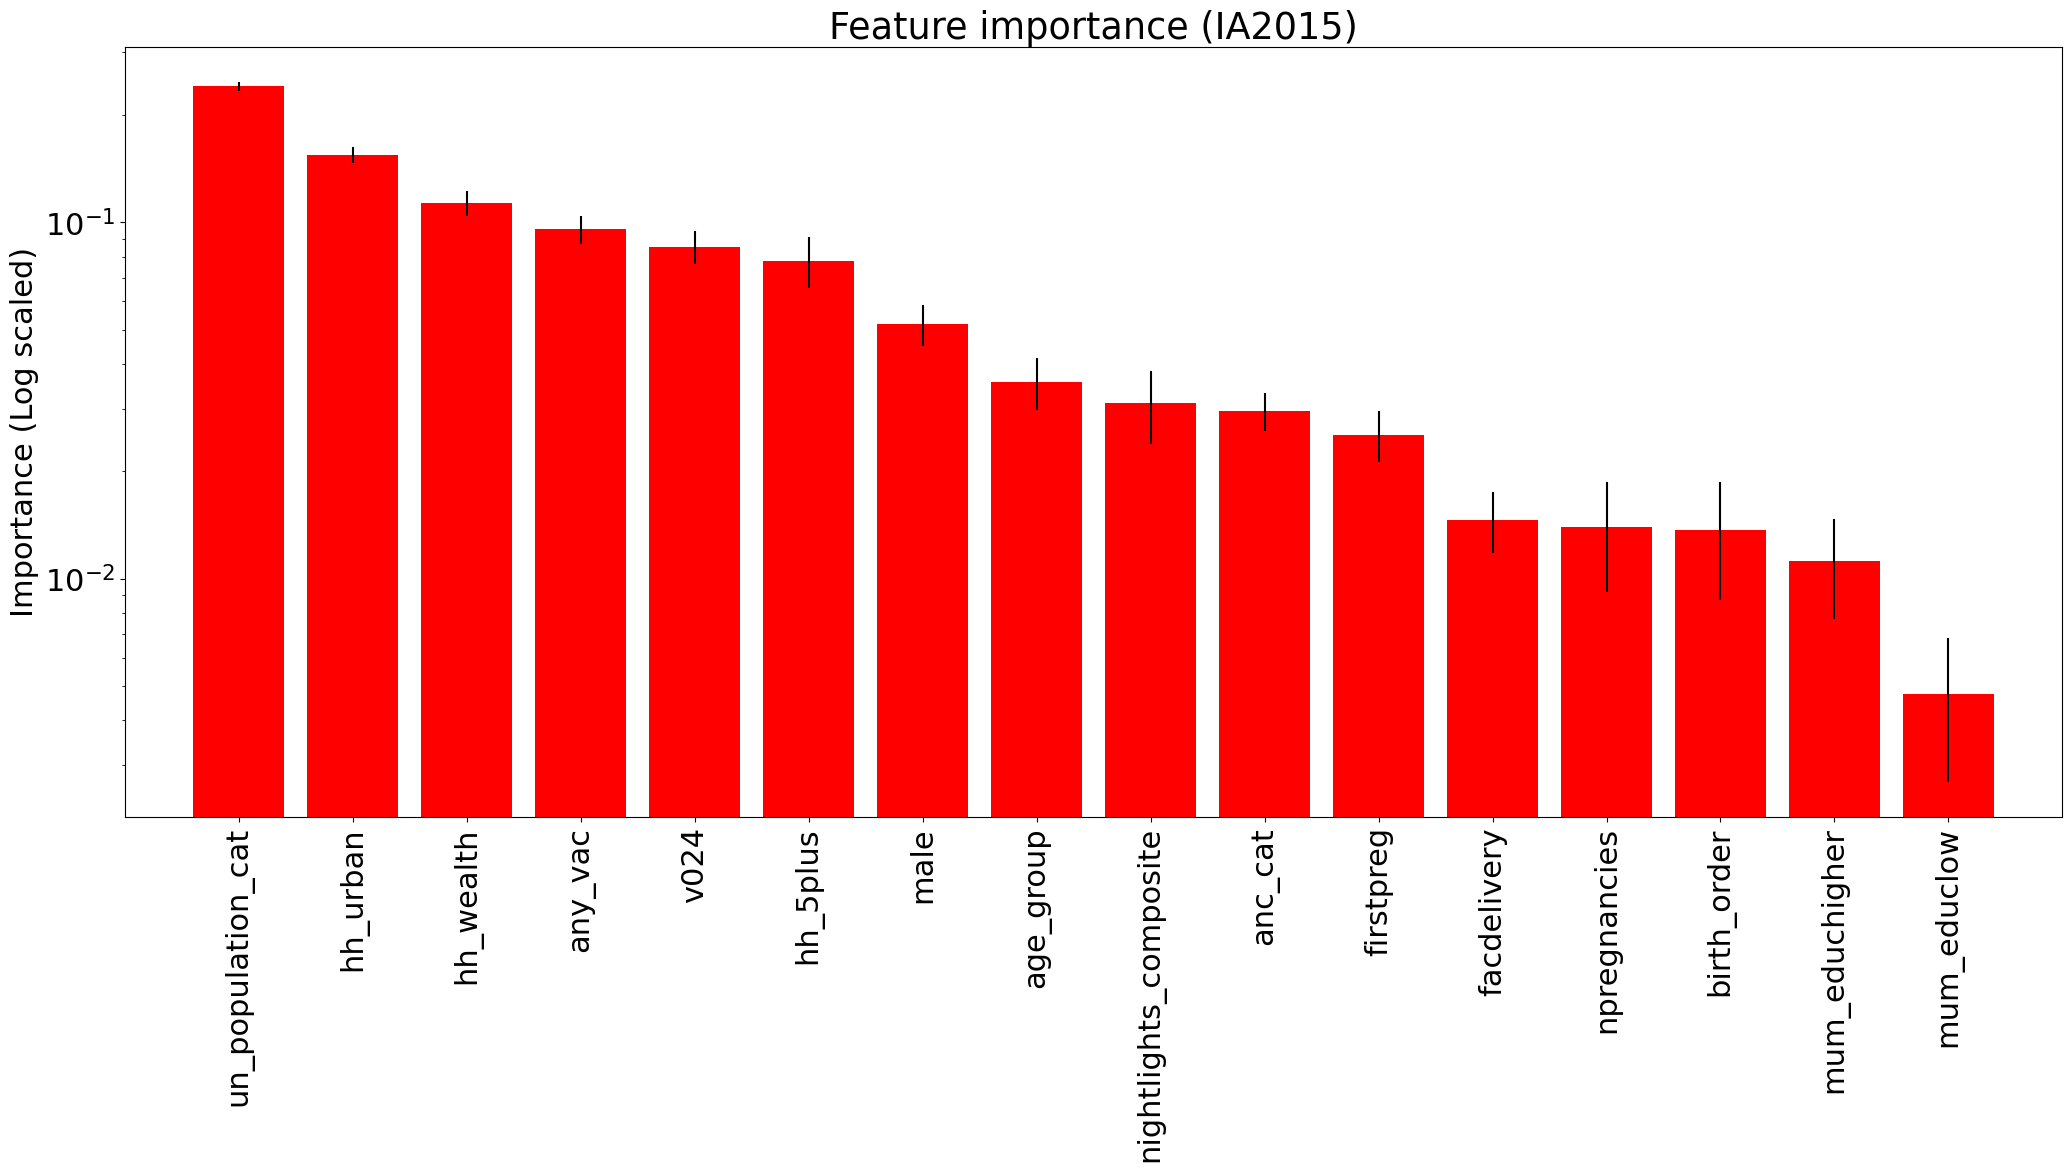

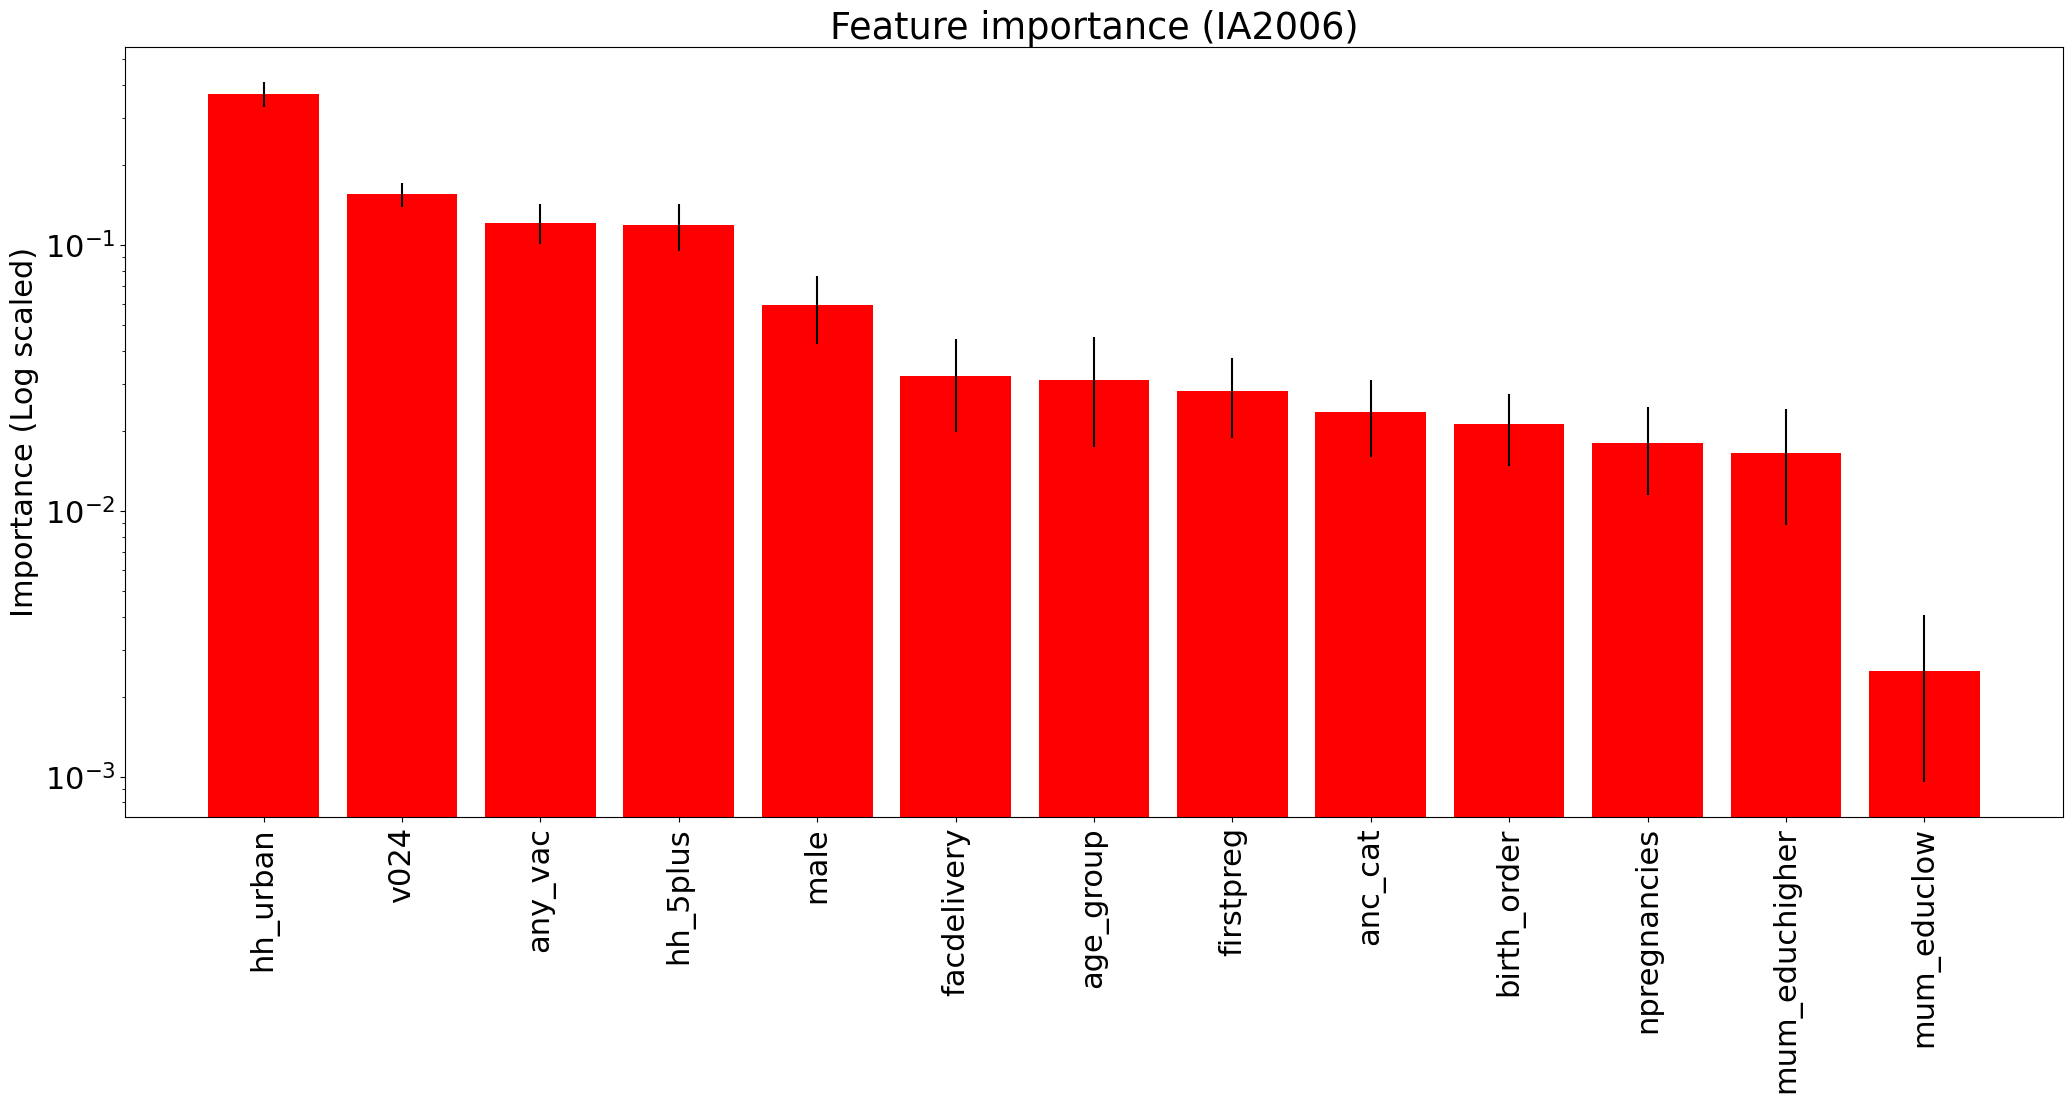

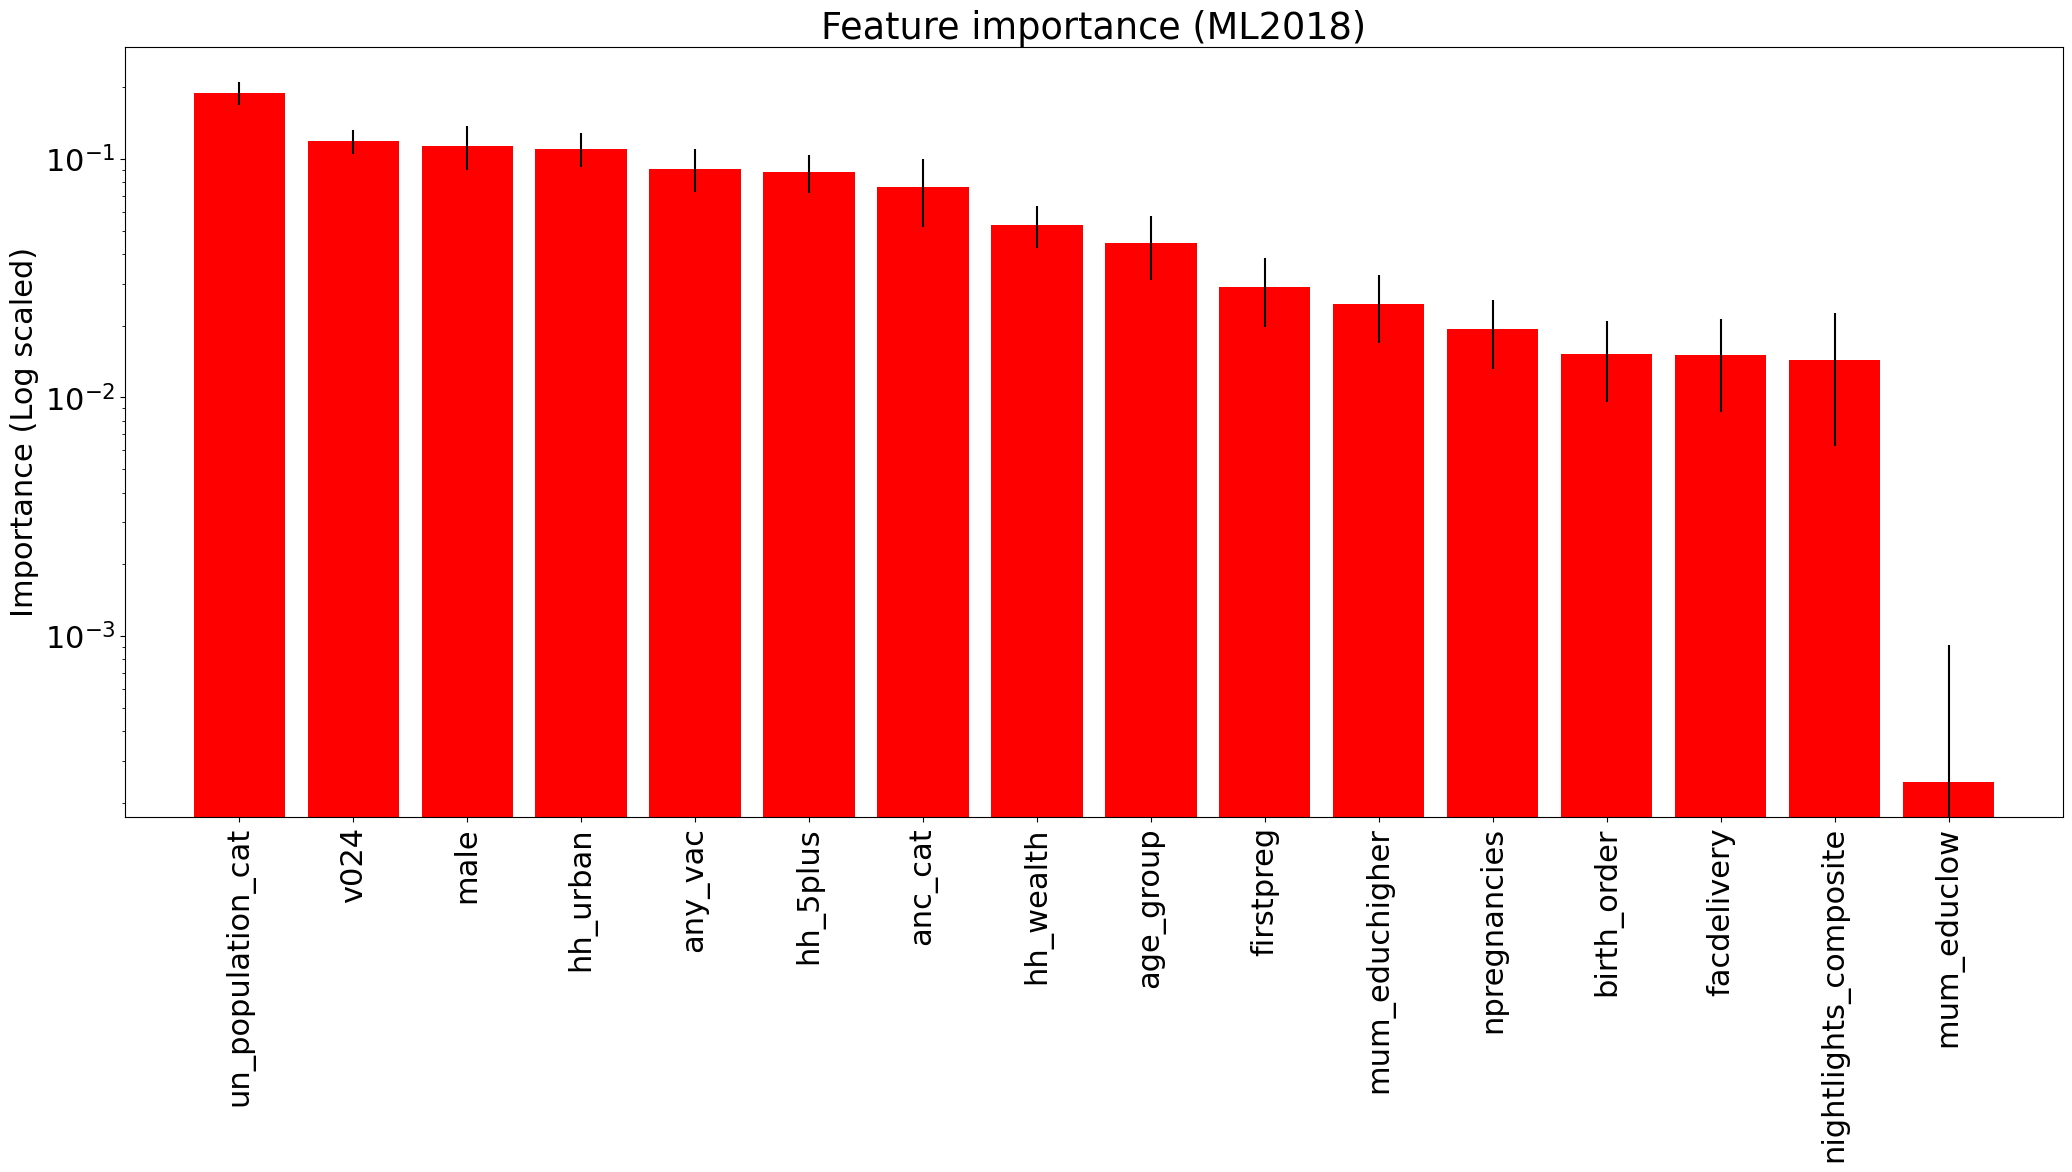

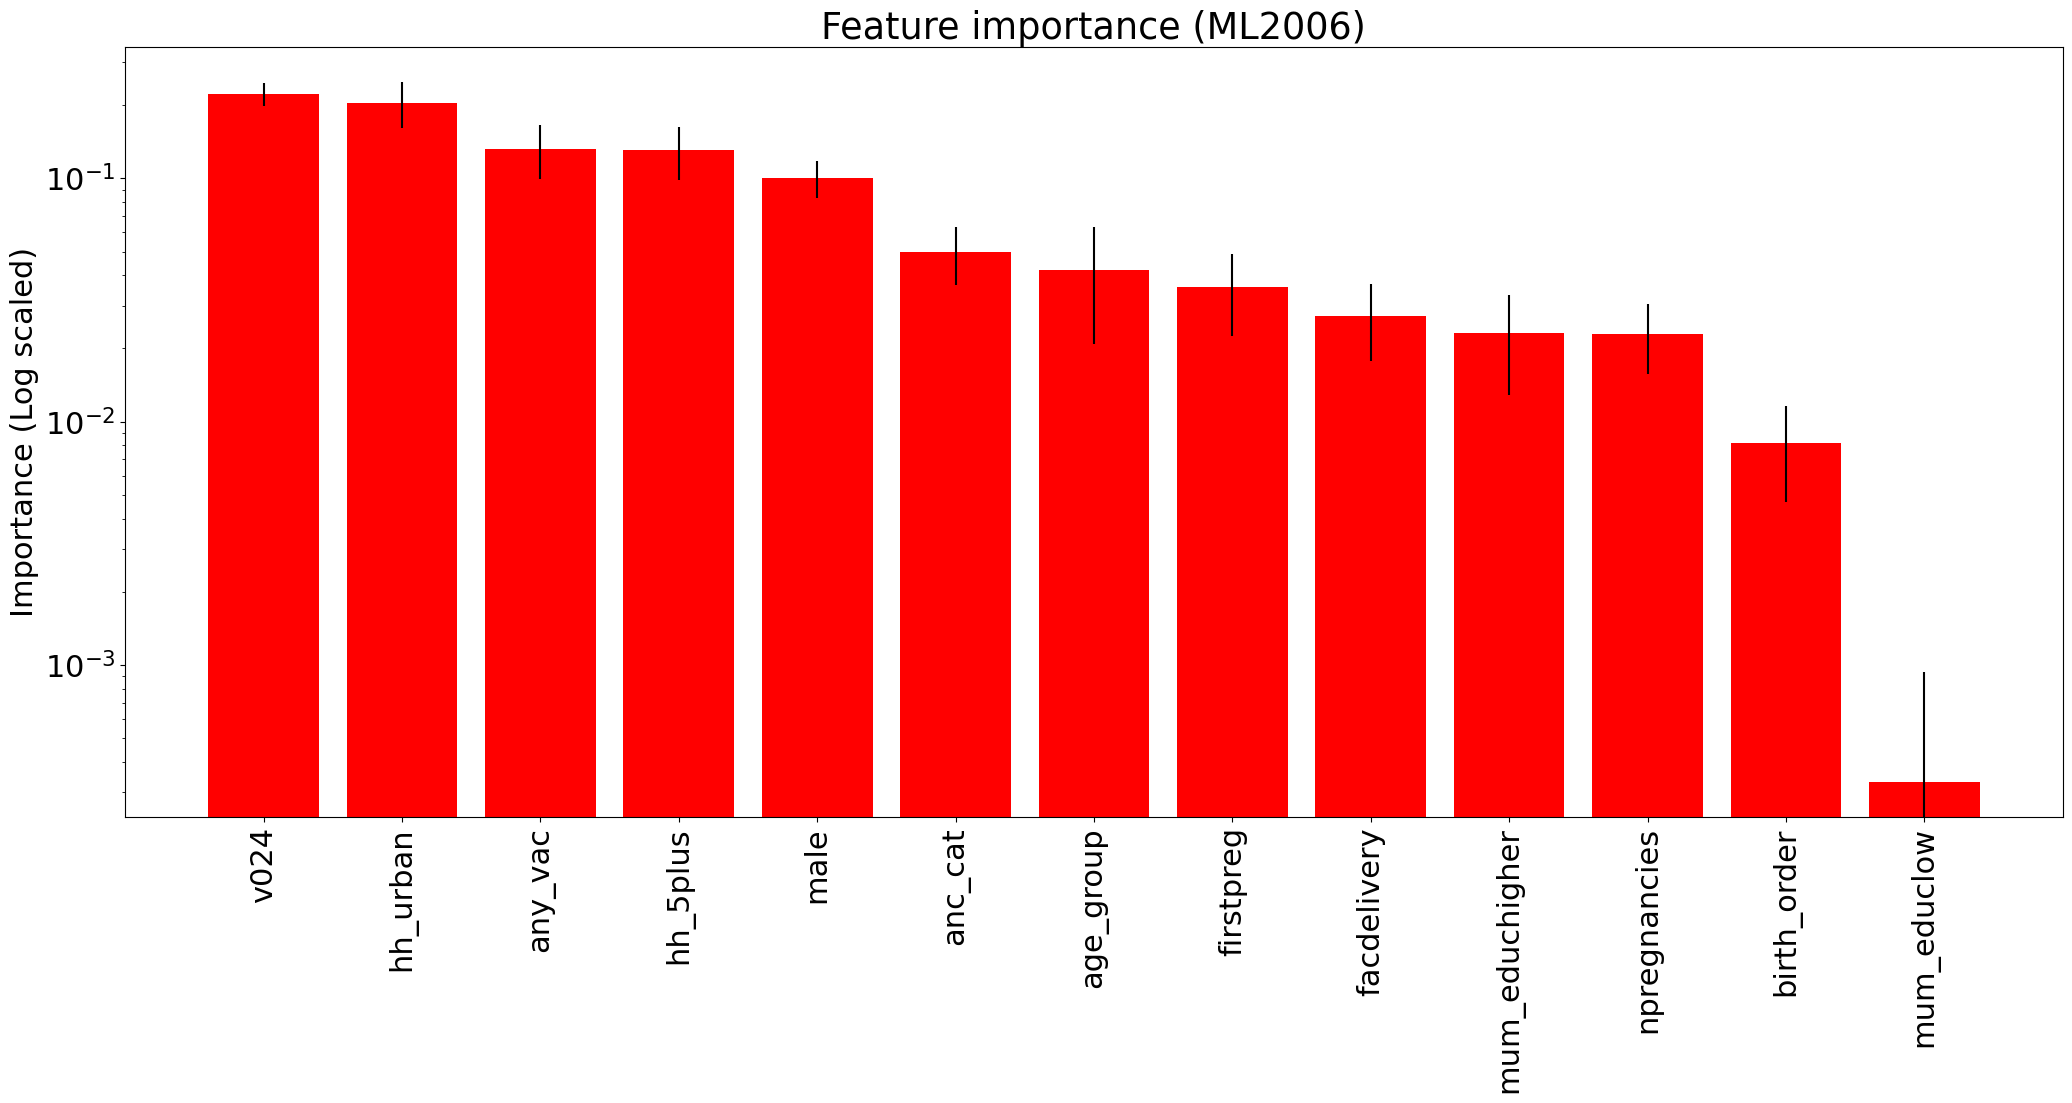

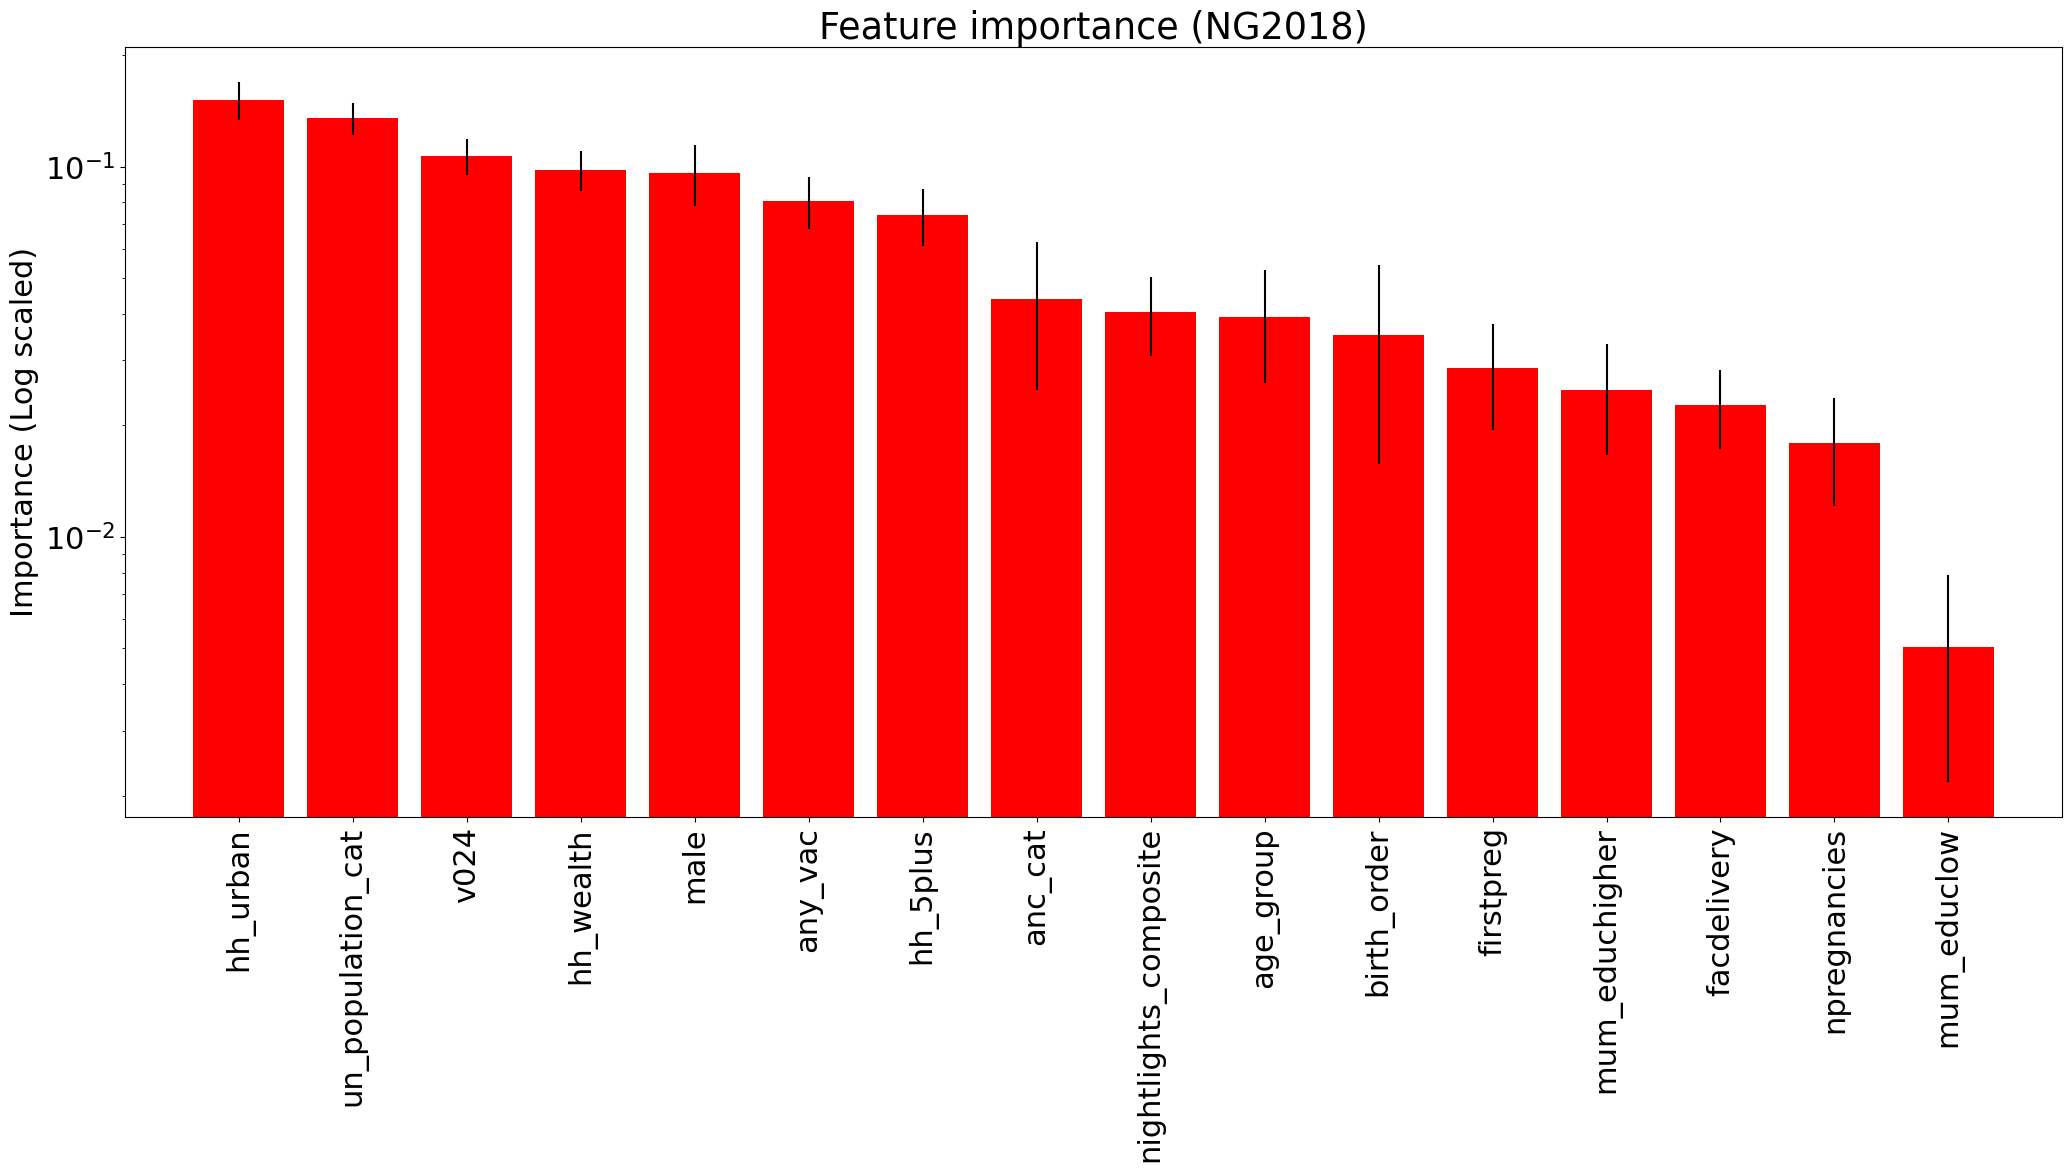

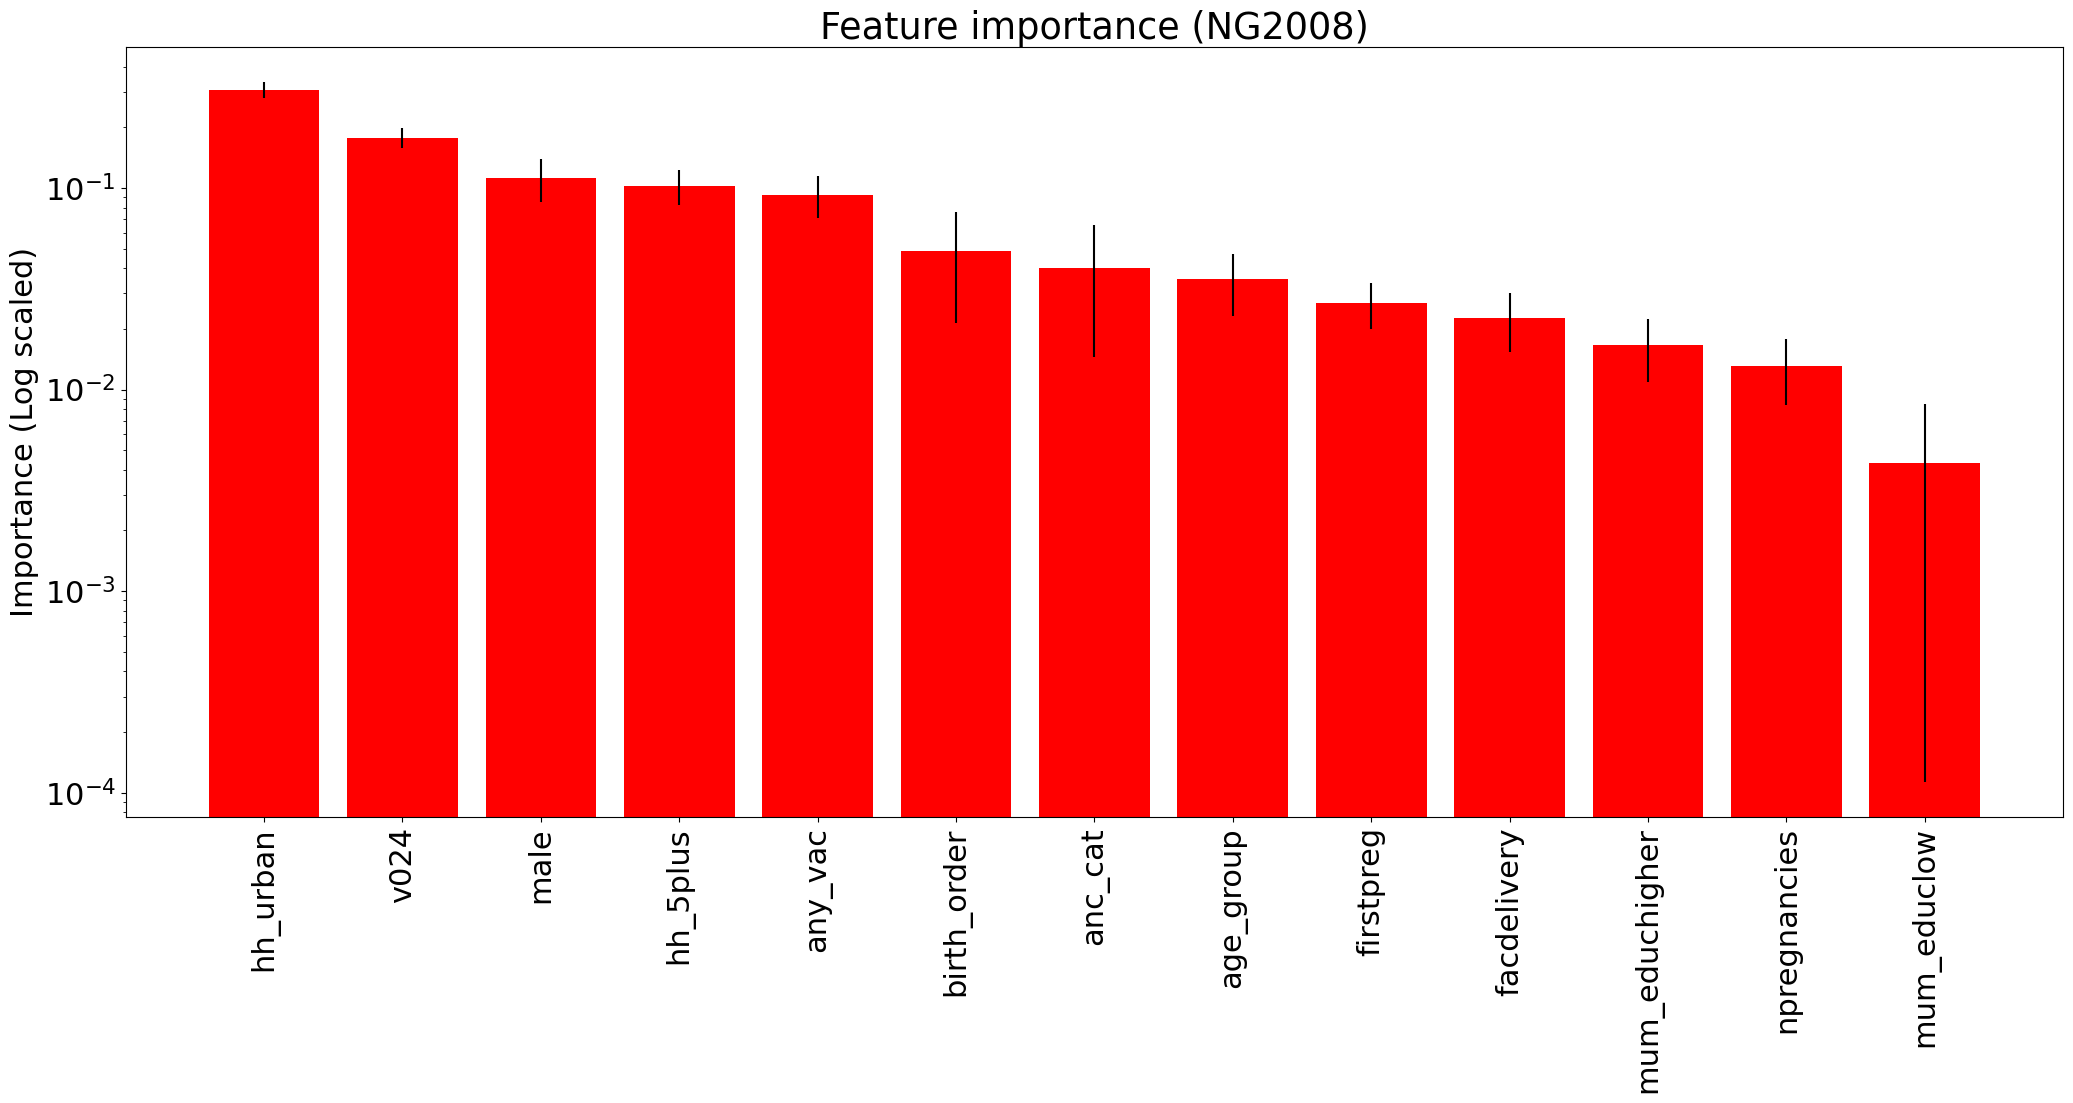

In [4]:
#Feature importance using random forest
plt.rcParams.update({'font.size': 22})
for country in countries:
    df = read_file(country)
    X = get_clean_dataset(country)
    column_names = X.columns
    y=X['any_vac']
    X = X.drop('any_vac', axis=1)

    X = np.array(X)
    y = np.array(y)

    from sklearn.preprocessing import LabelEncoder
    for i in range (X.shape[1]):
        #print(np.unique(X[:,i]))
        le = LabelEncoder()
        X[:,i] = le.fit_transform(X[:,i])


    from sklearn.ensemble import ExtraTreesClassifier
    # Build a forest and compute the feature importances
    forest = ExtraTreesClassifier(n_estimators=100,
                                random_state=0)

    forest.fit(X, y)
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],
                axis=0)
    indices = np.argsort(importances)[::-1]
    # Print the feature ranking
    #print("Feature ranking:")

    sorted_column_names = []
    for f in range(X.shape[1]):
        #print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
        #print((f + 1, column_names[indices[f]], importances[indices[f]]))
        sorted_column_names.append(column_names[indices[f]])

    # Plot the feature importances of the forest
    plt.figure(figsize=(25,10))
    plt.title('Feature importance ('+country+')')
    plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
    plt.xticks(range(X.shape[1]), sorted_column_names,  rotation='vertical')
    plt.xlim([-1, X.shape[1]])
    plt.yscale('log')
    plt.ylabel('Importance (Log scaled)')
    #plt.savefig('feat_importance'+country+'.pdf', format = 'pdf', dpi=600, bbox_inches='tight')
    #plt.savefig('feature_importance'+country+'.png', format = 'png', dpi=600, bbox_inches='tight')

    plt.show()

Index(['Child is male', 'Child delivered in a health facility', 'Birth order',
       'Mother has primary education', 'Mother has secondary education',
       'Number of pregnancies', 'Child was first pregnancy',
       'Household with 5+ members', 'Travel time', 'Age 15-17 months',
       'Age 18-20 months', 'Age 21-23 months', '1-3 antenatal visits',
       'No antenatal visit', 'Poorer', 'Poorest', 'Richer', 'Richest',
       'Nightlights (fifth decile)', 'Nightlights (first decile)',
       'Nightlights (fourth decile)', 'Nightlights (nineth decile)',
       'Nightlights (second decile)', 'Nightlights (seventh decile)',
       'Nightlights (sixth decile)', 'Nightlights (tenth decile)',
       'Nightlights (third decile)', 'No nightlight',
       'Medium Population Density', 'Low Population Density',
       'Andhra Pradesh/Telangana', 'Arunachal Pradesh', 'Assam',
       'Bihar/Jharkhand', 'Chandigarh', 'Delhi',
       'Goa/Dadra and Nager Haveli/Daman and Diu', 'Gujarat', 'Haryana'

C:\Users\Arpita\AppData\Local\Temp\ipykernel_23160\2824164227.py:187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs2 = coefs1.append(coefs2)


                                          Coefficients
No antenatal visit                           -0.545999
Mizoram                                      -0.253254
1-3 antenatal visits                         -0.162951
Poorest                                      -0.140812
Child delivered in a health facility          0.335350
Rajasthan                                     0.353361
Tamil Nadu                                    0.360385
Manipur                                       0.401052
Karnataka                                     0.406386
Pondicherry                                   0.445075
Goa/Dadra and Nager Haveli/Daman and Diu      0.497410
Bihar/Jharkhand                               0.535351
Tripura                                       0.575262
Himachal Pradesh                              0.580747
Orissa                                        0.666567
West Bengal                                   0.741560
Chandigarh                                    0.970899
Lakshwadee

<Figure size 2500x1500 with 0 Axes>

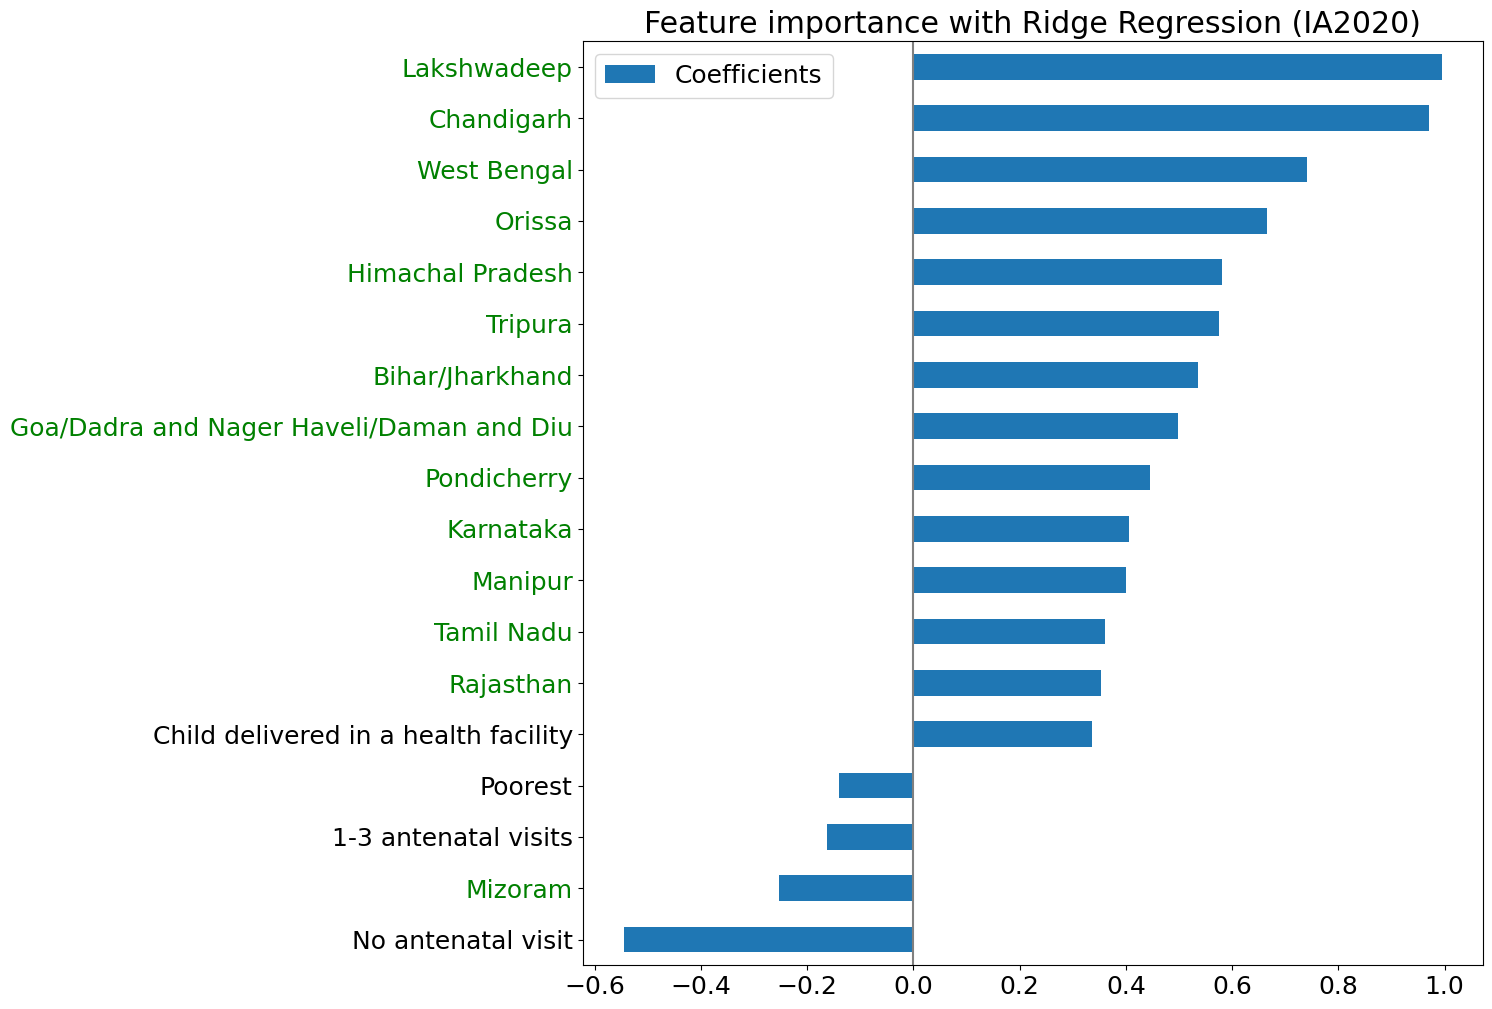

Index(['Child is male', 'Child delivered in a health facility', 'Birth order',
       'Mother has primary education', 'Mother has secondary education',
       'Number of pregnancies', 'Child was first pregnancy',
       'Household with 5+ members', 'Travel time', 'Age 15-17 months',
       'Age 18-20 months', 'Age 21-23 months', '1-3 antenatal visits',
       'No antenatal visit', 'Poorer', 'Poorest', 'Richer', 'Richest',
       'Nightlights (fifth decile)', 'Nightlights (first decile)',
       'Nightlights (fourth decile)', 'Nightlights (nineth decile)',
       'Nightlights (second decile)', 'Nightlights (seventh decile)',
       'Nightlights (sixth decile)', 'Nightlights (tenth decile)',
       'Nightlights (third decile)', 'No nightlight',
       'Medium Population Density', 'Low Population Density',
       'Andhra Pradesh/Telangana', 'Arunachal Pradesh', 'Assam',
       'Bihar/Jharkhand', 'Chandigarh', 'Delhi',
       'Goa/Dadra and Nager Haveli/Daman and Diu', 'Gujarat', 'Haryana'

C:\Users\Arpita\AppData\Local\Temp\ipykernel_23160\2824164227.py:187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs2 = coefs1.append(coefs2)


                                          Coefficients
No antenatal visit                           -0.602475
Nightlights (third decile)                   -0.201642
Nightlights (fourth decile)                  -0.188558
Nightlights (second decile)                  -0.185249
Nightlights (first decile)                   -0.178927
Child delivered in a health facility          0.317233
Tripura                                       0.547507
Arunachal Pradesh                             0.610974
Maharastra                                    0.686923
Assam                                         0.705670
Gujarat                                       0.730136
Nagaland                                      0.756424
Meghalaya                                     0.776184
Orissa                                        0.936104
Chandigarh                                    0.950442
Manipur                                       0.956101
Rajasthan                                     0.969236
Karnataka 

<Figure size 2500x1500 with 0 Axes>

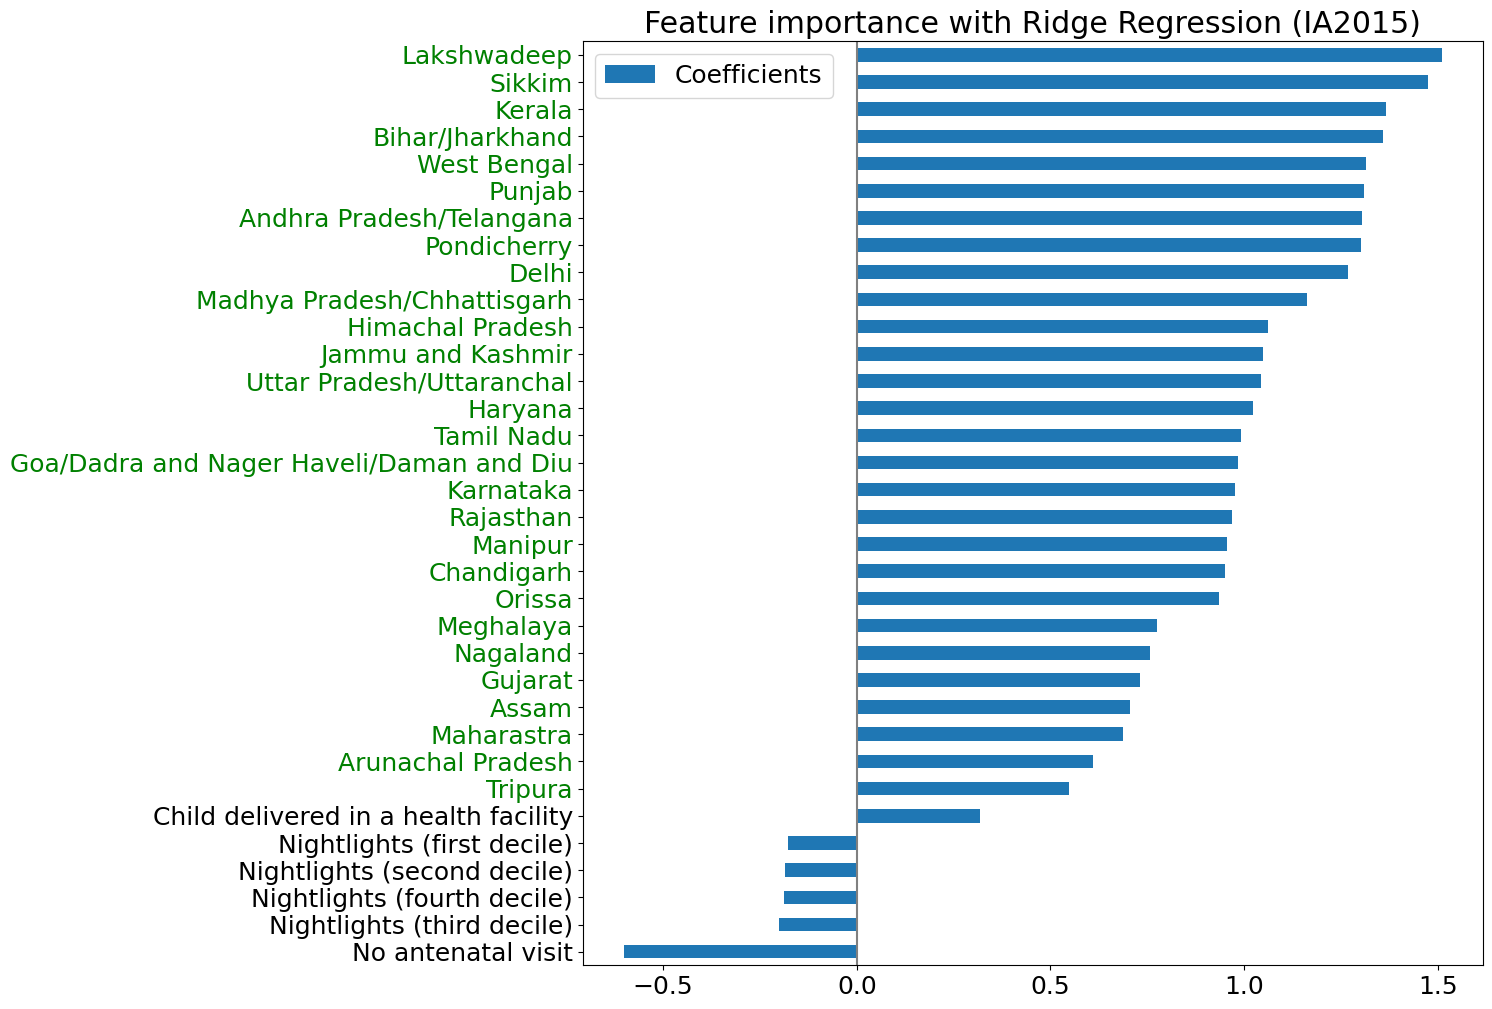

Index(['Child is male', 'Child delivered in a health facility', 'Birth order',
       'Mother has primary education', 'Mother has secondary education',
       'Number of pregnancies', 'Child was first pregnancy',
       'Household with 5+ members', 'Age 15-17 months', 'Age 18-20 months',
       'Age 21-23 months', '1-3 antenatal visits', 'No antenatal visit',
       'Poorer', 'Poorest', 'Richer', 'Richest', 'Arunachal Pradesh', 'Assam',
       'Bihar/Jharkhand', 'Delhi', 'Goa/Dadra and Nager Haveli/Daman and Diu',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir',
       'Karnataka', 'Kerala', 'Madhya Pradesh/Chhattisgarh', 'Maharastra',
       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Orissa', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Tripura',
       'Uttar Pradesh/Uttaranchal', 'West Bengal'],
      dtype='object')
                                          Coefficients
No antenatal visit                           -0.572134
Arunachal Pradesh     

C:\Users\Arpita\AppData\Local\Temp\ipykernel_23160\2824164227.py:187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs2 = coefs1.append(coefs2)


<Figure size 2500x1500 with 0 Axes>

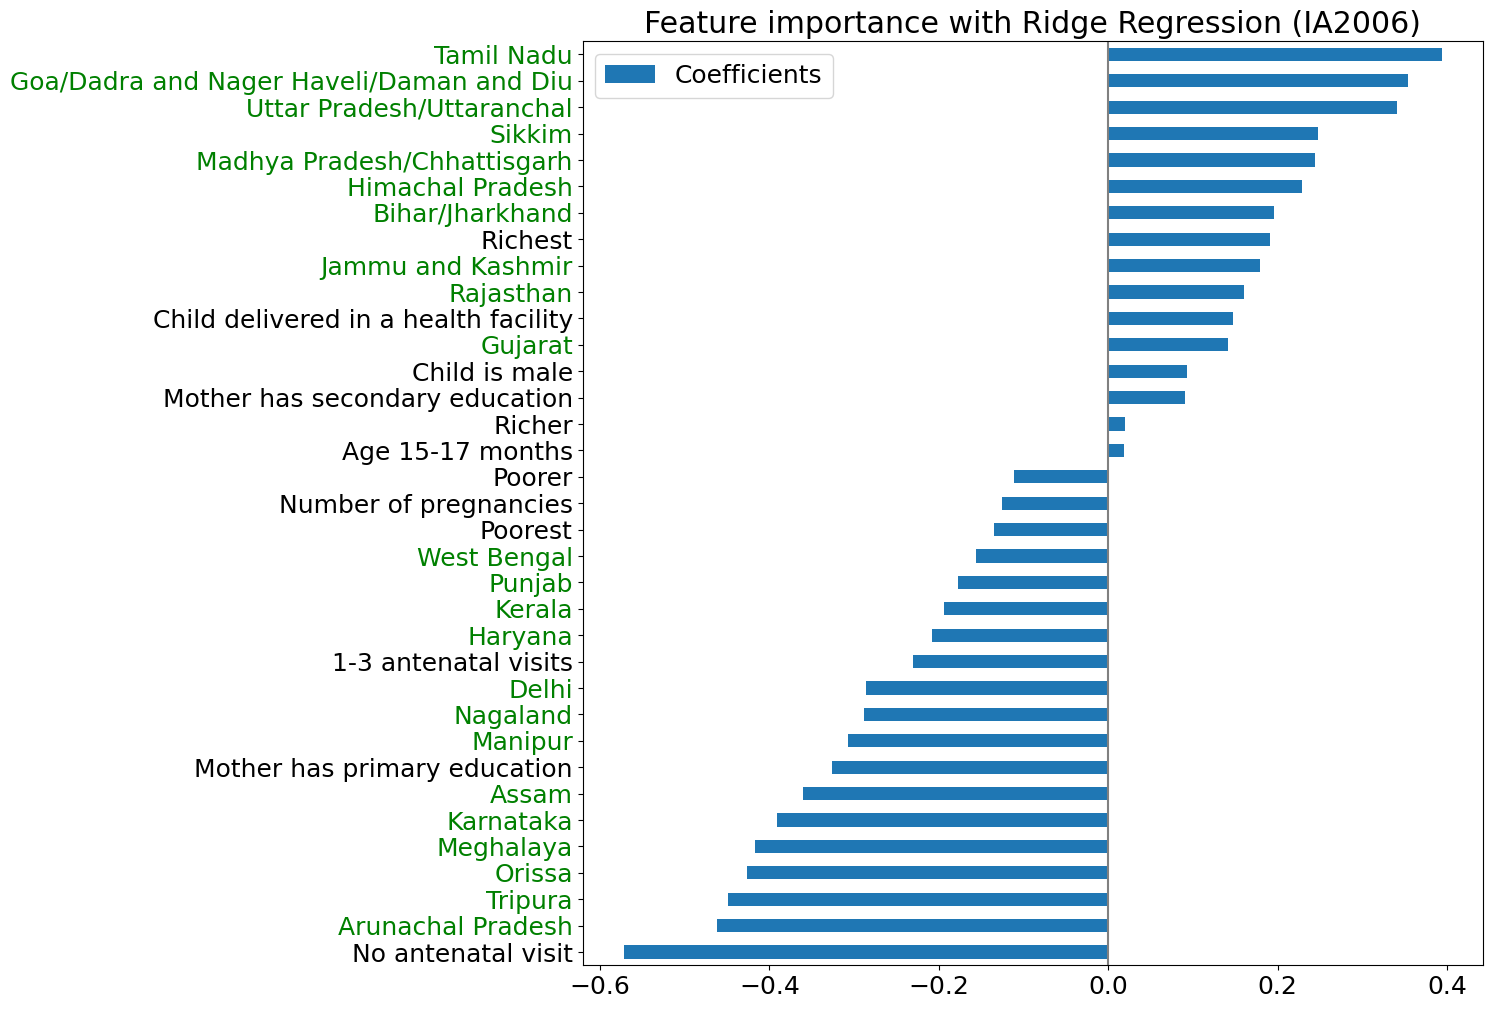

Index(['Child is male', 'Child delivered in a health facility', 'Birth order',
       'Mother has primary education', 'Mother has secondary education',
       'Number of pregnancies', 'Child was first pregnancy',
       'Household with 5+ members', 'Travel time', 'Age 15-17 months',
       'Age 18-20 months', 'Age 21-23 months', '1-3 antenatal visits',
       'No antenatal visit', 'Poorer', 'Poorest', 'Richer', 'Richest',
       'Nightlights (fifth decile)', 'Nightlights (first decile)',
       'Nightlights (fourth decile)', 'Nightlights (nineth decile)',
       'Nightlights (second decile)', 'Nightlights (seventh decile)',
       'Nightlights (sixth decile)', 'Nightlights (tenth decile)',
       'Nightlights (third decile)', 'No nightlight',
       'Medium Population Density', 'Low Population Density', 'Gao/Kidal',
       'Kayes', 'Koulikoro', 'Mopti', 'Sikasso', 'Segou', 'Tombouctou'],
      dtype='object')
                                      Coefficients
Gao/Kidal                 

C:\Users\Arpita\AppData\Local\Temp\ipykernel_23160\2824164227.py:187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs2 = coefs1.append(coefs2)


<Figure size 2500x1500 with 0 Axes>

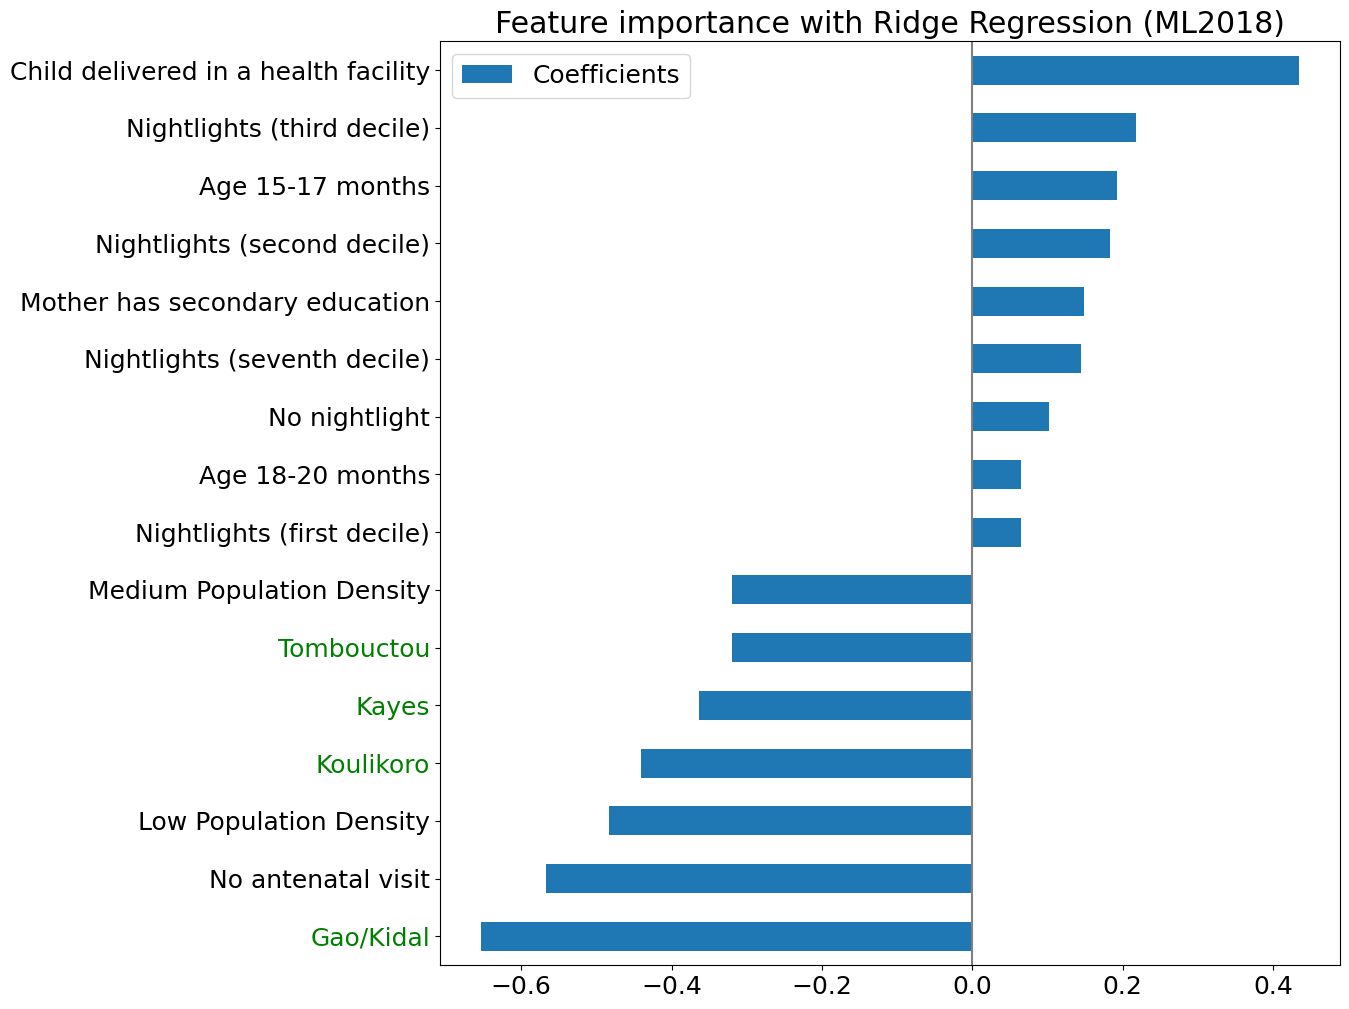

Index(['Child is male', 'Child delivered in a health facility', 'Birth order',
       'Mother has primary education', 'Mother has secondary education',
       'Number of pregnancies', 'Child was first pregnancy',
       'Household with 5+ members', 'Age 15-17 months', 'Age 18-20 months',
       'Age 21-23 months', '1-3 antenatal visits', 'No antenatal visit',
       'Poorer', 'Poorest', 'Richer', 'Richest', 'Gao/Kidal', 'Kayes',
       'Koulikoro', 'Mopti', 'Sikasso', 'Segou', 'Tombouctou'],
      dtype='object')
                                      Coefficients
No antenatal visit                       -0.883486
1-3 antenatal visits                     -0.330458
Gao/Kidal                                -0.151180
Mother has primary education             -0.144975
Household with 5+ members                -0.124116
Child was first pregnancy                -0.118949
Mopti                                    -0.113240
Tombouctou                               -0.070987
Child is male         

C:\Users\Arpita\AppData\Local\Temp\ipykernel_23160\2824164227.py:187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs2 = coefs1.append(coefs2)


<Figure size 2500x1500 with 0 Axes>

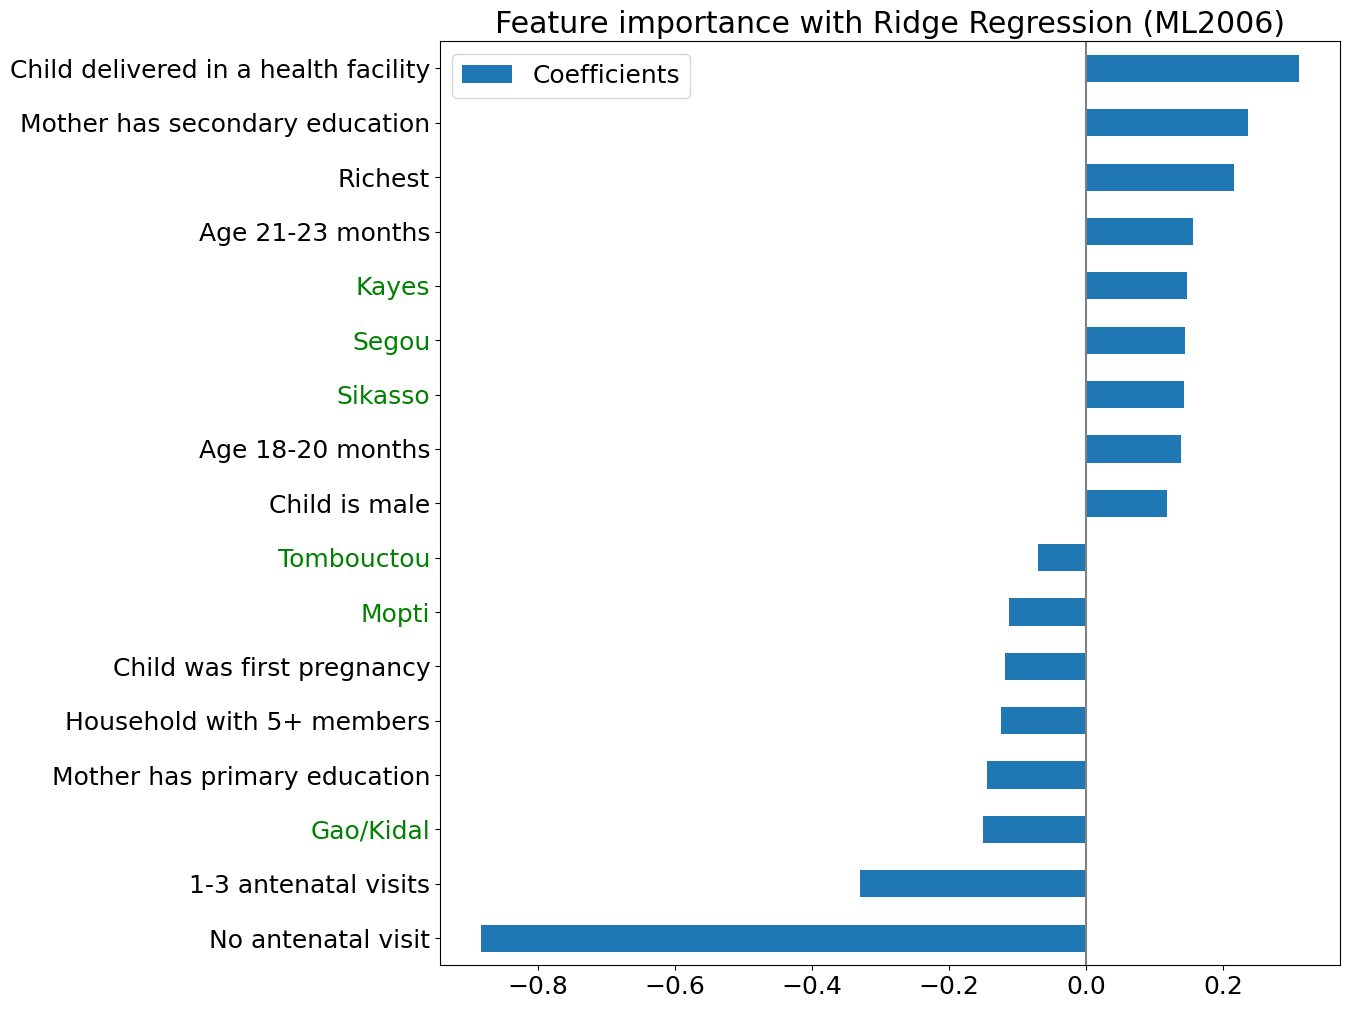

Index(['Child is male', 'Child delivered in a health facility', 'Birth order',
       'Mother has primary education', 'Mother has secondary education',
       'Number of pregnancies', 'Child was first pregnancy',
       'Household with 5+ members', 'Travel time', 'Age 15-17 months',
       'Age 18-20 months', 'Age 21-23 months', '1-3 antenatal visits',
       'No antenatal visit', 'Poorer', 'Poorest', 'Richer', 'Richest',
       'Nightlights (fifth decile)', 'Nightlights (first decile)',
       'Nightlights (fourth decile)', 'Nightlights (nineth decile)',
       'Nightlights (second decile)', 'Nightlights (seventh decile)',
       'Nightlights (sixth decile)', 'Nightlights (tenth decile)',
       'Nightlights (third decile)', 'No nightlight',
       'Medium Population Density', 'Low Population Density', 'Abuja',
       'Adamawa', 'Akwa Ibom', 'Anambra', 'Bauchi', 'Bayelsa', 'Benue',
       'Borno', 'Cross River', 'Delta', 'Ebonyi', 'Edo', 'Ekiti', 'Enugu',
       'Gombe', 'Imo', 'Jigaw

C:\Users\Arpita\AppData\Local\Temp\ipykernel_23160\2824164227.py:187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs2 = coefs1.append(coefs2)


<Figure size 2500x1500 with 0 Axes>

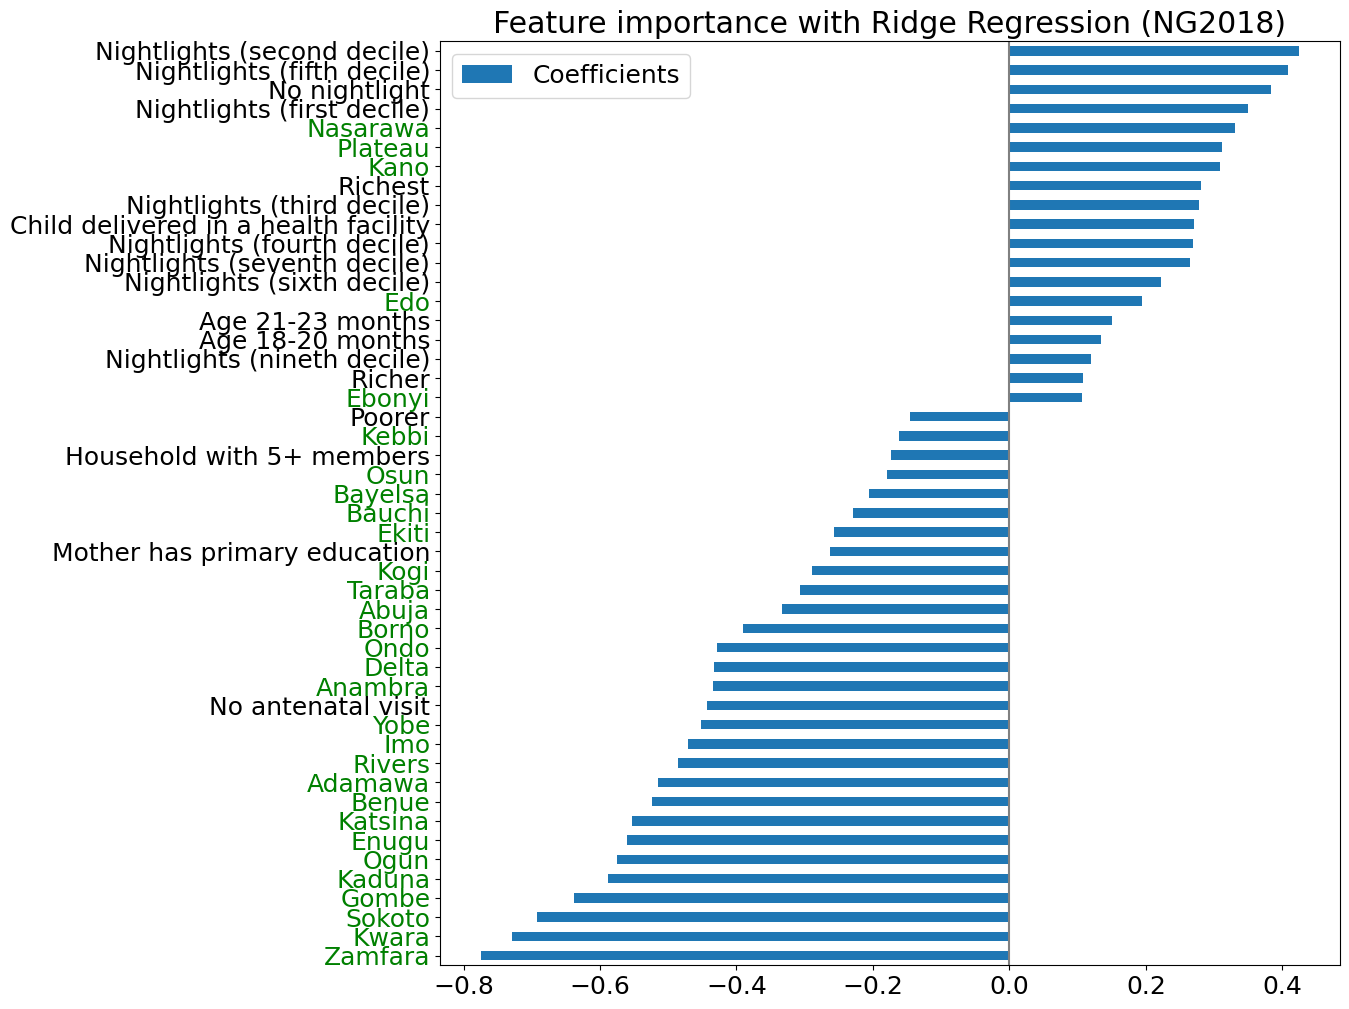

Index(['Child is male', 'Child delivered in a health facility', 'Birth order',
       'Mother has primary education', 'Mother has secondary education',
       'Number of pregnancies', 'Child was first pregnancy',
       'Household with 5+ members', 'Age 15-17 months', 'Age 18-20 months',
       'Age 21-23 months', '1-3 antenatal visits', 'No antenatal visit',
       'Poorer', 'Poorest', 'Richer', 'Richest', 'Abuja', 'Adamawa',
       'Akwa Ibom', 'Anambra', 'Bauchi', 'Bayelsa', 'Benue', 'Borno',
       'Cross River', 'Delta', 'Ebonyi', 'Edo', 'Ekiti', 'Enugu', 'Gombe',
       'Imo', 'Jigawa', 'Kaduna', 'Kano', 'Katsina', 'Kebbi', 'Kogi', 'Kwara',
       'Lagos', 'Nasarawa', 'Niger', 'Ogun', 'Ondo', 'Osun', 'Oyo', 'Plateau',
       'Rivers', 'Sokoto', 'Taraba', 'Yobe', 'Zamfara'],
      dtype='object')
                                      Coefficients
No antenatal visit                       -0.400527
Mother has primary education             -0.339331
Sokoto                            

C:\Users\Arpita\AppData\Local\Temp\ipykernel_23160\2824164227.py:187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs2 = coefs1.append(coefs2)


<Figure size 2500x1500 with 0 Axes>

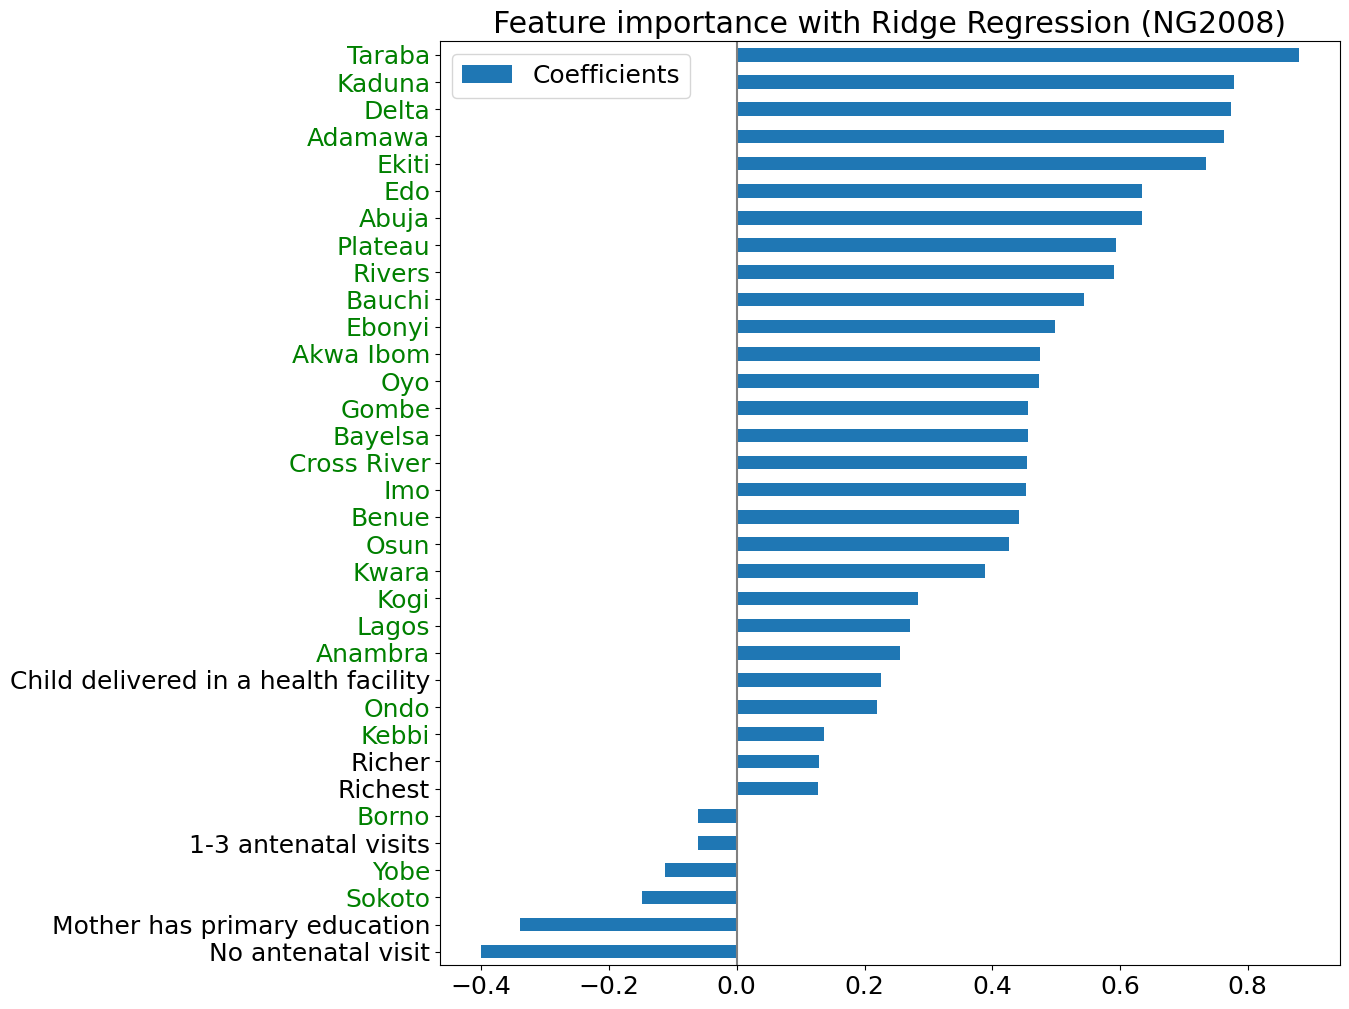

In [12]:
#Feature importance using Ridge Regression
from sklearn import linear_model as lm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


def encode_dataset(X, verbose = False):
    for i in range (X.shape[1]):
        le = LabelEncoder()
        X[X.columns[i]] = le.fit_transform(X.values[:,i])
    if verbose:
        print('Encoded dataset X')
        print('X.head='+X.head)
    return (X)

def encode_array(y, verbose = False):
    le = LabelEncoder()
    y = le.fit_transform(y)
    if verbose:
        print('Encoded array y')
        print ('y='+y)
    return (y)

plt.rcParams.update({'font.size': 18})
countries = ['IA2020', 'IA2015', 'IA2006', 'ML2018', 'ML2006', 'NG2018', 'NG2008']
#countries = ['IA2020']
#For neat feature importance graph: 
parameters = pd.DataFrame()
parameters['IA2020'] = [0.3, -0.115]
parameters['IA2015'] = [0.3, -0.16]
parameters['IA2006'] = [0.01, -0.07]
parameters['ML2018'] = [0.03, -0.31]
parameters['ML2006'] = [0.1, -0.07]
parameters['NG2018'] = [0.1, -0.14]
parameters['NG2008'] = [0.1, -0.05]

for country in countries:
    df = read_file(country)

    #Get a map of 'v024' to 'regionnames'    
    #look = df[['v024', 'regionname']]
    #look.drop_duplicates(subset=['v024', 'regionname'], keep='last')
    #look['v024'] = 'v024_'+look['v024'].astype(str)
    #look['regionname'] = 'region_'+look['regionname'].astype(str)
    #look = pd.Series(look.regionname.values,index=look.v024).to_dict()
    #print(look)


    X=df.drop(['clusterid', 'v024', 'hh_urban', 'all_vac'], axis=1)
    X['regionname']=X['regionname'].astype('category')
    if (country in ['IA2020']):
        X=X.drop(['sdist'], axis=1)
    if (country in ['IA2015']): 
        X=X.drop(['sdist', 'ia2015fic', 'IMI_target'], axis=1)
    X = X.dropna()
    y=X['any_vac']
    #X['v024'] = X['v024'].astype('category')
    X = X.drop('any_vac', axis =1)
    X = pd.get_dummies(data=X, drop_first=True)
    states =[]
  
    X.rename(columns={'male': 'Child is male', 
            'facdelivery':'Child delivered in a health facility', 
            'birth_order': 'Birth order', 
            'mum_educlow': 'Mother has primary education', 'mum_educhigher': 'Mother has secondary education',
            'npregnancies':'Number of pregnancies', 
            'firstpreg': 'Child was first pregnancy', 
            'hh_5plus': 'Household with 5+ members', 'travel_times_2015': 'Travel time',
            'age_group_12-14': 'Age 12-14 months', 'age_group_15-17': 'Age 15-17 months', 
            'age_group_18-20':'Age 18-20 months', 'age_group_21-24': 'Age 21-23 months', 
            'anc_cat_high': 'At least 4 antenatal visits',
            'anc_cat_low': '1-3 antenatal visits',
            'anc_cat_no': 'No antenatal visit', 
            'hh_wealth_poorer': 'Poorer', 'hh_wealth_poorest': 'Poorest',
            'hh_wealth_richer': 'Richer', 'hh_wealth_richest': 'Richest', 
            'hh_wealth_medium': 'Medium Wealth', 
            'nightlights_composite_fifth': 'Nightlights (fifth decile)',
            'nightlights_composite_first': 'Nightlights (first decile)', 
            'nightlights_composite_fourth': 'Nightlights (fourth decile)',
            'nightlights_composite_eighth': 'Nightlights (eighth decile)',
            'nightlights_composite_nineth': 'Nightlights (nineth decile)', 
            'nightlights_composite_second': 'Nightlights (second decile)',
            'nightlights_composite_seventh': 'Nightlights (seventh decile)', 
            'nightlights_composite_sixth': 'Nightlights (sixth decile)',
            'nightlights_composite_tenth': 'Nightlights (tenth decile)', 
            'nightlights_composite_third':'Nightlights (third decile)',
            'nightlights_composite_zero': 'No nightlight', 
            'un_population_cat_City':'High Population Density',
            'un_population_cat_Town': "Medium Population Density",
            'un_population_cat_Village': 'Low Population Density', 
            'regionname_andhra pradesh':'Andhra Pradesh',
            'regionname_arunachal pradesh':'Arunachal Pradesh', 'regionname_assam':'Assam', 'regionname_bihar':'Bihar',
            'regionname_chandigarh': 'Chandigarh', 'regionname_chhattisgarh': 'Chhattisgarh',
            'regionname_dadra & nagar haveli and daman & diu': 'Dadra, Nagar Haveli Daman, Diu', 'regionname_goa': 'Goa',
            'regionname_gujarat': 'Gujarat', 'regionname_haryana': 'Haryana',
            'regionname_himachal pradesh': 'Himachal Pradesh', 'regionname_jammu & kashmir': 'Jammu and Kashmir',
            'regionname_jammu and kashmir': 'Jammu and Kashmir', 'regionname_jharkhand': 'Jharkhand', 'regionname_karnataka': 'Karnataka', 'regionname_kerala': 'Kerala',
            'regionname_lakshadweep': 'Lakshwadeep', 'regionname_madhya pradesh': 'Madhya Pradesh',
            'regionname_maharashtra': 'Maharastra', 'regionname_manipur': 'Manipur', 'regionname_meghalaya':'Meghalaya',
            'regionname_mizoram':'Mizoram', 'regionname_nagaland':'Nagaland', 'regionname_nct of delhi': 'Delhi',
            'regionname_odisha': 'Odisha', 'regionname_puducherry': 'Puducherry', 'regionname_punjab': 'Punjab',
            'regionname_rajasthan': 'Rajasthan', 'regionname_sikkim': 'Sikkim', 'regionname_tamil nadu': 'Tamil Nadu',
            'regionname_telangana': 'Telangana', 'regionname_tripura': 'Tripura',
            'regionname_uttar pradesh': 'Uttar Pradesh', 'regionname_uttarakhand': 'Uttarakhand',
            'regionname_west bengal': 'West Bengal',  'regionname_dadra and nagar haveli': 'Dadra and Nagar Haveli', 
            'regionname_daman and diu': 'Daman and Diu', 'regionname_delhi': 'Delhi',
            'regionname_[ar] arunachal pradesh': 'Arunachal Pradesh', 'regionname_[as] assam': 'Assam',
            'regionname_[bh] bihar': 'Bihar', 'regionname_[ch] chhattisgarh': 'Chhattisgarh',
            'regionname_[dl] delhi': 'Delhi', 'regionname_[gj] gujarat': 'Gujarat',
            'regionname_[go] goa': 'Goa', 'regionname_[hp] himachal pradesh': 'Himachal Pradesh',
            'regionname_[hr] haryana': 'Haryana', 'regionname_[jh] jharkhand': 'Jharkhand',
            'regionname_[jm] jammu and kashmir': 'Jammu and Kashmir', 'regionname_[ka] karnataka': 'Karnataka',
            'regionname_[ke] kerala': 'Kerala', 'regionname_[mg] meghalaya': 'Meghalaya',
            'regionname_[mh] maharashtra': 'Maharastra', 'regionname_[mn] manipur': 'Manipur',
            'regionname_[mp] madhya pradesh': 'Madhya Pradesh', 'regionname_[mz] mizoram': 'Mizoram',
            'regionname_[na] nagaland': 'Nagaland', 'regionname_[or] orissa': 'Orissa',
            'regionname_[pj] punjab': 'Punjab', 'regionname_[rj] rajasthan': 'Rajasthan',
            'regionname_[sk] sikkim': 'Sikkim', 'regionname_[tn] tamil nadu': 'Tamil Nadu',
            'regionname_[tr] tripura': 'Tripura', 'regionname_[uc] uttaranchal': 'Uttaranchal',
            'regionname_[up] uttar pradesh': 'Uttar Pradesh', 'regionname_[wb] west bengal': 'West Bengal',
            'regionname_gao': 'Gao','regionname_kayes': 'Kayes', 'regionname_kidal': 'Kidal', 'regionname_koulikoro': 'Koulikoro',
            'regionname_mopti': 'Mopti', 'regionname_segou': 'Segou', 'regionname_sikasso': 'Sikasso',
            'regionname_toumbouctou': 'Toumbouctou', 
            'regionname_north east': 'North East', 'regionname_north west': 'North West',
            'regionname_south east': 'South East', 'regionname_south south': 'South',
            'regionname_south west': 'South West', 
            'regionname_andhra pradesh and telangana': 'Andhra Pradesh/Telangana',
            'regionname_bihar and jharkhand': 'Bihar/Jharkhand',
            'regionname_goa; dadra and nagar haveli; daman and diu': 'Goa/Dadra and Nager Haveli/Daman and Diu',
            'regionname_madhya pradesh and chhattisgarh': 'Madhya Pradesh/Chhattisgarh',
            'regionname_orissa': 'Orissa', 'regionname_pondicherry': 'Pondicherry',
            'regionname_uttar pradesh and uttaranchal': 'Uttar Pradesh/Uttaranchal',
            'regionname_sã©gou': 'Segou', 'regionname_tombouctou': 'Tombouctou', 'regionname_gao and kidal': 'Gao/Kidal',
            'regionname_abuja': 'Abuja',
            'regionname_adamawa': 'Adamawa', 'regionname_akwa ibom': 'Akwa Ibom', 'regionname_anambra': 'Anambra',
            'regionname_bauchi': 'Bauchi', 'regionname_bayelsa': 'Bayelsa', 'regionname_benue': 'Benue',
            'regionname_borno': 'Borno', 'regionname_cross river': 'Cross River', 'regionname_delta': 'Delta',
            'regionname_ebonyi': 'Ebonyi', 'regionname_edo': 'Edo', 'regionname_ekiti': 'Ekiti',
            'regionname_enugu': 'Enugu', 'regionname_gombe':'Gombe', 'regionname_imo':'Imo',
            'regionname_jigawa': 'Jigawa', 'regionname_kaduna':'Kaduna', 'regionname_kano':'Kano',
            'regionname_katsina': 'Katsina', 'regionname_kebbi':'Kebbi', 'regionname_kogi':'Kogi',
            'regionname_kwara': 'Kwara', 'regionname_lagos':'Lagos', 'regionname_nasarawa':'Nasarawa',
            'regionname_niger': 'Niger', 'regionname_ogun':'Ogun', 'regionname_ondo':'Ondo',
            'regionname_osun': 'Osun', 'regionname_oyo':'Oyo', 'regionname_plateau': 'Plateau',
            'regionname_rivers': 'Rivers', 'regionname_sokoto': 'Sokoto', 'regionname_taraba': 'Taraba',
            'regionname_yobe': 'Yobe', 'regionname_zamfara': 'Zamfara'            
            }, inplace=True)
    states = ['Andhra Pradesh',
            'Arunachal Pradesh', 'Assam', 'Bihar',
            'Chandigarh', 'Chhattisgarh','Dadra, Nagar Haveli Daman, Diu', 'Goa',
            'Gujarat', 'Haryana','Himachal Pradesh','Jammu and Kashmir','Jharkhand',
            'Karnataka', 'Kerala', 'Lakshwadeep', 'Madhya Pradesh','Maharastra', 
            'Manipur', 'Meghalaya', 'Mizoram','Nagaland', 'Delhi','Odisha',
            'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim','Tamil Nadu',
            'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand','West Bengal',
            'Dadra and Nagar Haveli', 'Daman and Diu', 'Gao', 'Kayes', 'Koulikoro', 
            'Kidal', 'Toumbouctou', 'Sikasso', 'Segou', 'Mopti', 
            'North East', 'North West', 'South East', 'South West', 'South',
            'Andhra Pradesh/Telangana','Bihar/Jharkhand',
            'Goa/Dadra and Nager Haveli/Daman and Diu','Madhya Pradesh/Chhattisgarh',
            'Orissa', 'Pondicherry', 'Uttar Pradesh/Uttaranchal', 
            'Segou', 'Tombouctou', 'Gao/Kidal',
            'Abuja','Adamawa', 'Akwa Ibom','Anambra','Bauchi', 'Bayelsa', 'Benue',
            'Borno', 'Cross River', 'Delta','Ebonyi', 'Edo','Ekiti',
            'Enugu','Gombe', 'Imo','Jigawa','Kaduna', 'Kano',
            'Katsina', 'Kebbi','Kogi', 'Kwara', 'Lagos', 'Nasarawa',
            'Niger','Ogun', 'Ondo','Osun', 'Oyo', 'Plateau',
            'Rivers', 'Sokoto','Taraba', 'Yobe', 'Zamfara'  ]
    #print(X.dtypes)    
    column_names = X.columns
    print(column_names)

    X = encode_dataset(X)
    y = encode_array(y) 
    X, X_test, y, y_test = train_test_split(X, y, random_state=0, test_size = 0.3)
    
    weight = sum(y) / X.shape[0]

    model = lm.RidgeClassifier(class_weight = {0:weight, 1:1-weight}, alpha = 0.00000001, random_state=0)
    model.fit(X, y)
    coefs = pd.DataFrame(
            model.coef_.reshape((X.shape[1], 1)),
            columns=['Coefficients'], index=column_names
            )
    coefs1 = coefs[coefs['Coefficients']>parameters[country][0]]
    coefs2 = coefs[coefs['Coefficients']<parameters[country][1]]
    coefs2 = coefs1.append(coefs2)
    coefs2 = coefs2.sort_values(by='Coefficients')
    print(coefs2)

    plt.figure(figsize=(25,15))    
    coefs2.plot(kind='barh', figsize=(15, 12)) 
    ax=plt.subplot(111)   
    plt.title('Feature importance with Ridge Regression ('+country+')')
    plt.axvline(x=0, color='.5')
    plt.subplots_adjust(left=.3)
    colors = ['g','b']*32
    col_range = [colors[i] for i in np.arange(coefs2.index.shape[0])]
    indices = np.array(coefs2.index)
    for (i,t) in zip(np.arange(coefs2.index.shape[0]), ax.yaxis.get_ticklabels()):
        if indices[i] in states:
            #print("i"+str(i)+", "+indices[i])
            t.set_color(colors[0])

    #[t.set_color(i) for (i,t) in zip(col_range,ax.yaxis.get_ticklabels())]
    #plt.savefig('feat_importance'+country+'.pdf', format = 'pdf', dpi=600, bbox_inches='tight')
    plt.savefig('../results/Feature_importance/feature_importance_Ridge_'+country+'.png', format = 'png', dpi=600, bbox_inches='tight')

    plt.show()